In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime
import plotly.express as px

## Benefit Usage by Demographics

### Age

In [2]:
df = pd.read_csv('phase1_cleaned_data.csv')

In [3]:
df

,EmployeeID,Age,Gender,Department,Tenure,BenefitID,UsageFrequency,LastUsedDate,BenefitType,BenefitSubType,BenefitCost,AgeGroup,TenureType
0,1,62,Male,IT,8,9,5,2023-08-27,Professional Development,Conference Attendance,850.00,Boomer,medium
1,1,62,Male,IT,8,17,3,2024-07-02,Retirement Plan,401k Catch-Up Contributions,509.65,Boomer,medium
2,1,62,Male,IT,8,16,5,2023-09-16,Health Insurance,HDHP Individual,84.55,Boomer,medium
3,1,62,Male,IT,8,13,0,2024-04-16,Cell Phone Allowance,Monthly Communications,65.00,Boomer,medium
4,1,62,Male,IT,8,26,0,2024-03-27,Gym Membership,Family Membership,519.66,Boomer,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,5000,63,Male,Sales,32,14,7,2024-04-10,Gym Membership,Tier 1 Partners,73.36,Boomer,long
49994,5000,63,Male,Sales,32,5,3,2024-07-07,Technology Stipend,Monthly Internet Allowance,75.00,Boomer,long
49995,5000,63,Male,Sales,32,29,0,2024-04-26,Childcare,After-School Care,475.00,Boomer,long
49996,5000,63,Male,Sales,32,26,5,2024-05-25,Gym Membership,Family Membership,519.66,Boomer,long


In [4]:
# List all unique values in BenefitType
benefit_types = df['BenefitType'].unique()
print(benefit_types)

['Professional Development' 'Retirement Plan' 'Health Insurance'
 'Cell Phone Allowance' 'Gym Membership' 'Commuter Benefits'
 'Life Insurance' 'Childcare' 'Tuition Reimbursement' 'Technology Stipend'
 'Wellness Programs' 'Flexible Spending Account']


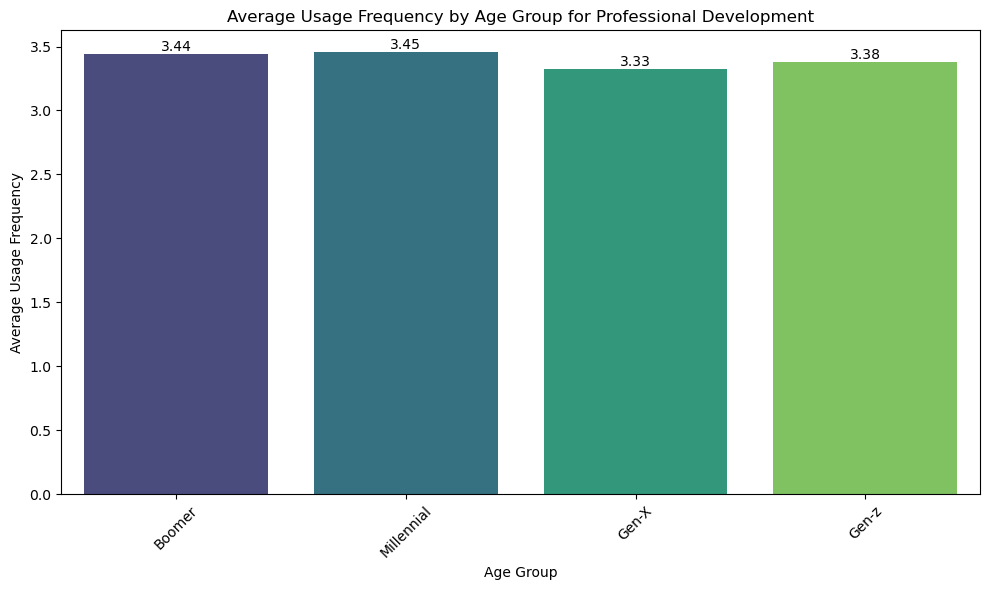

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [7]:
# Barplot of average UsageFrequency by AgeGroup for Professional Development
plt.rcParams['patch.edgecolor'] = 'none'
plt.rcParams['patch.linewidth'] = 0
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=df[df['BenefitType'] == 'Professional Development'],
    x='AgeGroup',
    y='UsageFrequency',
    estimator=np.mean,
    palette='viridis',
    errorbar=None
)
# Annotate each bar with its average value
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height,
        f'{height:.2f}',
        ha='center',
        va='bottom'
    )
plt.title('Average Usage Frequency by Age Group for Professional Development')
plt.xlabel('Age Group')
plt.ylabel('Average Usage Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 6))


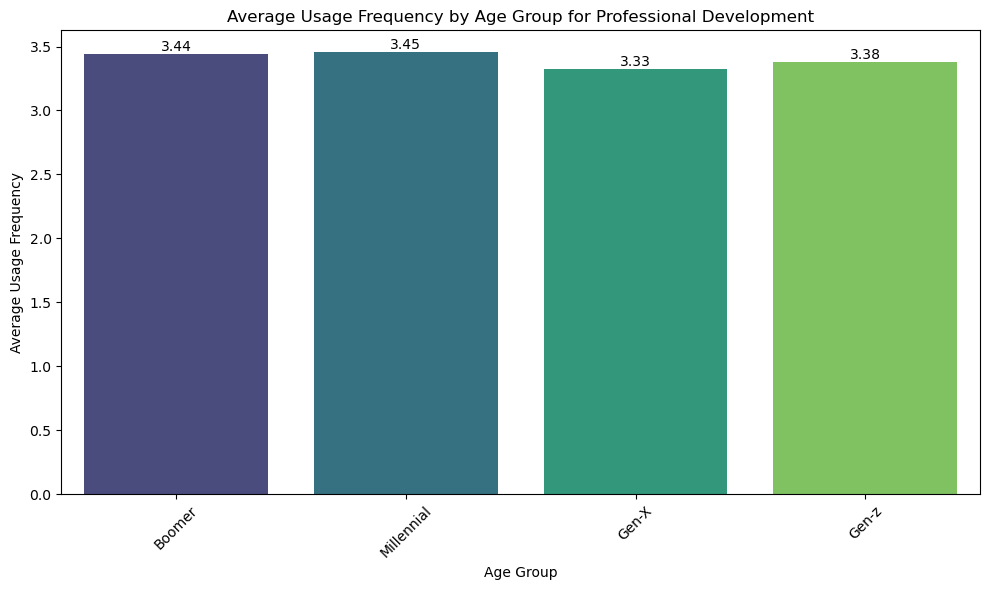

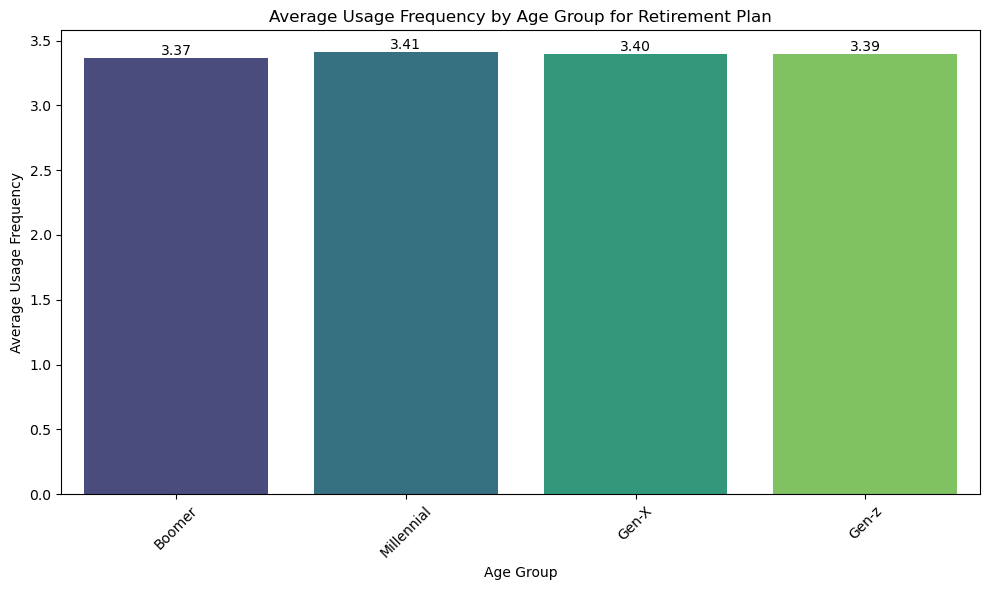

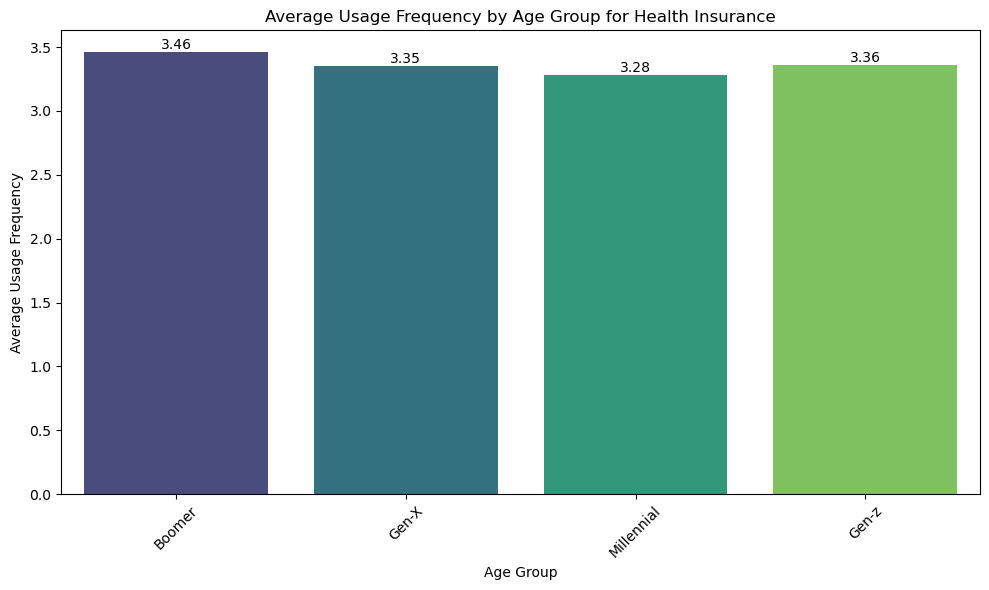

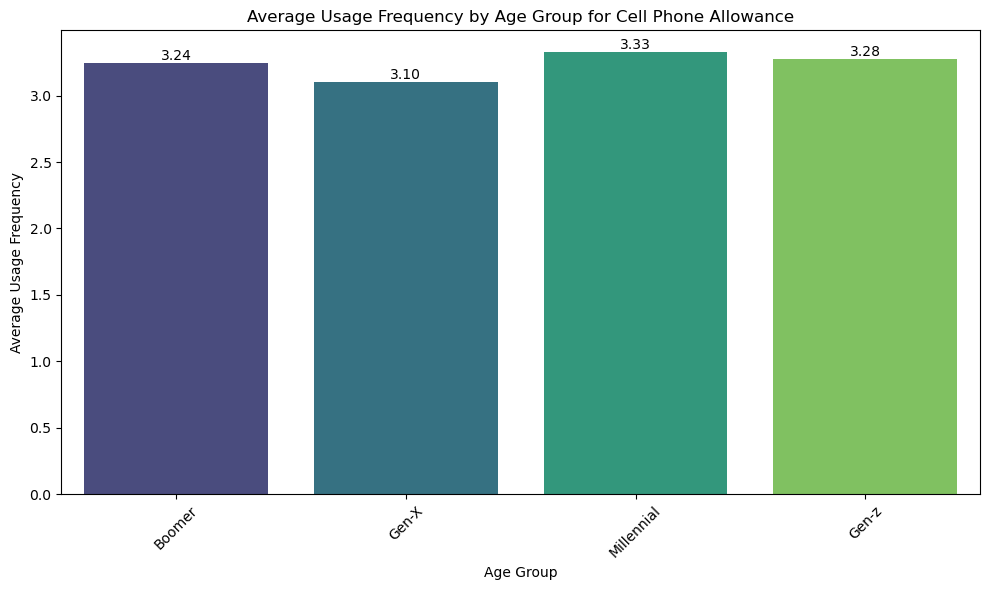

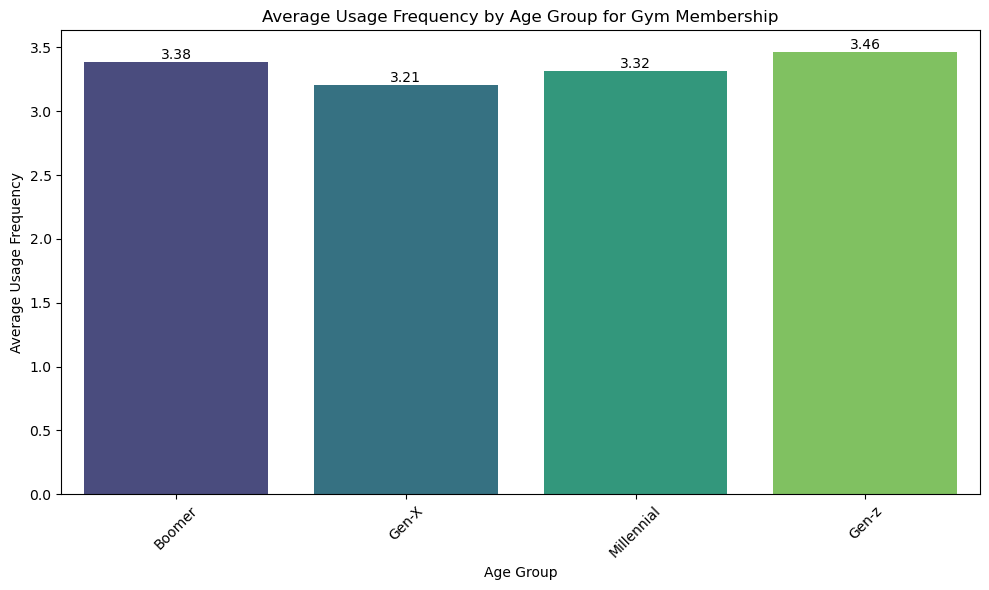

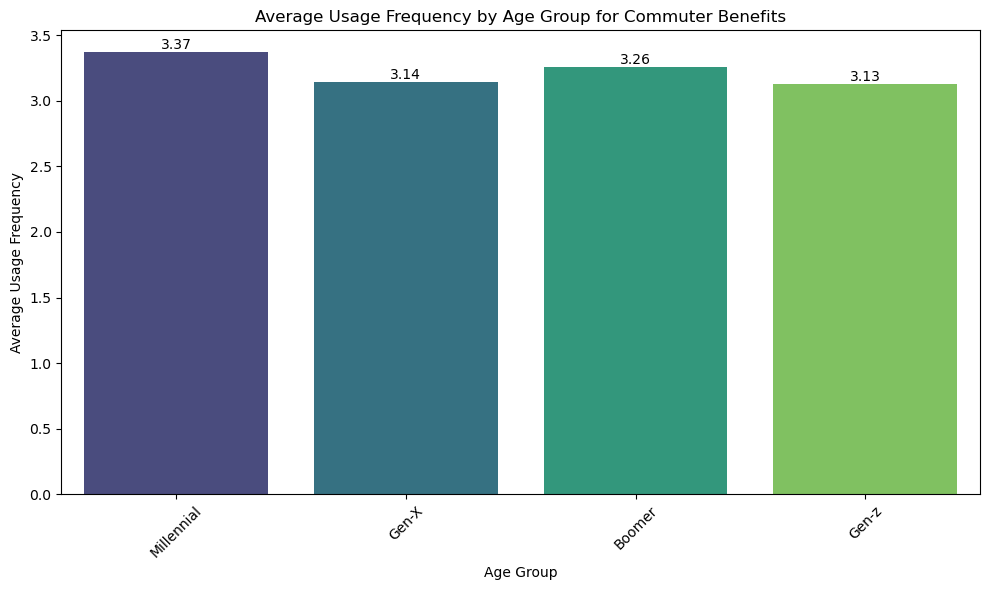

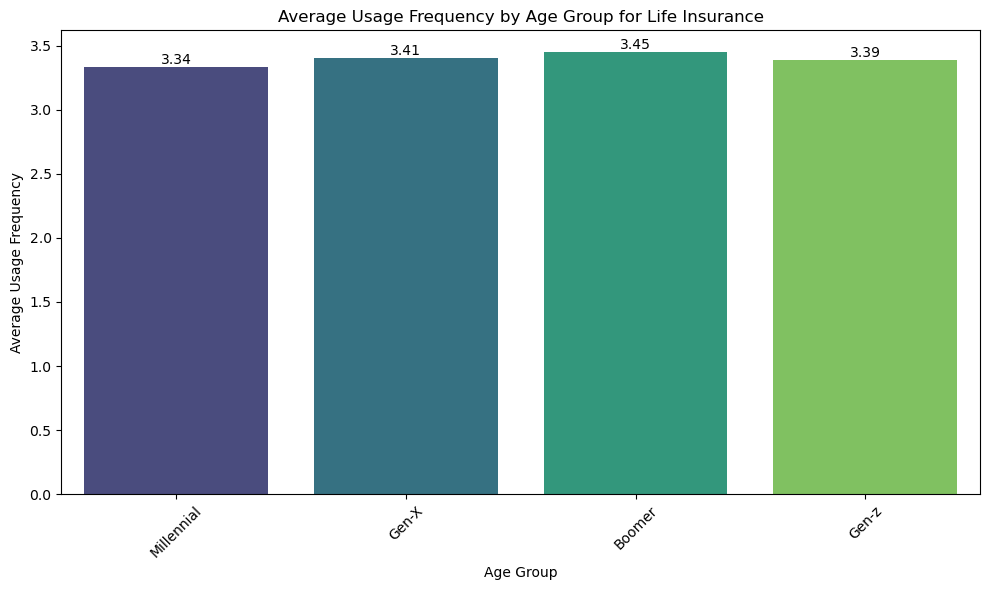

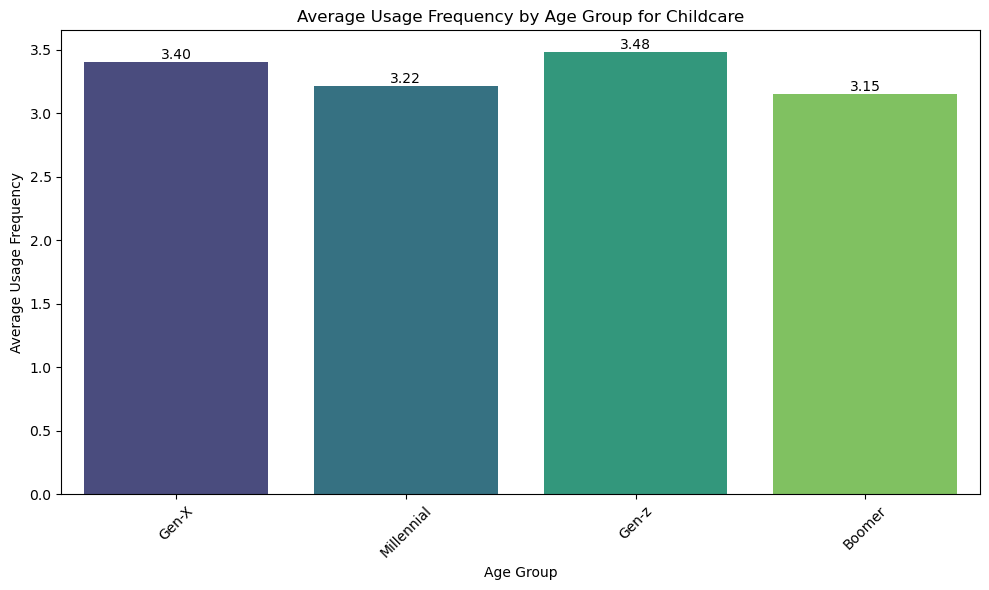

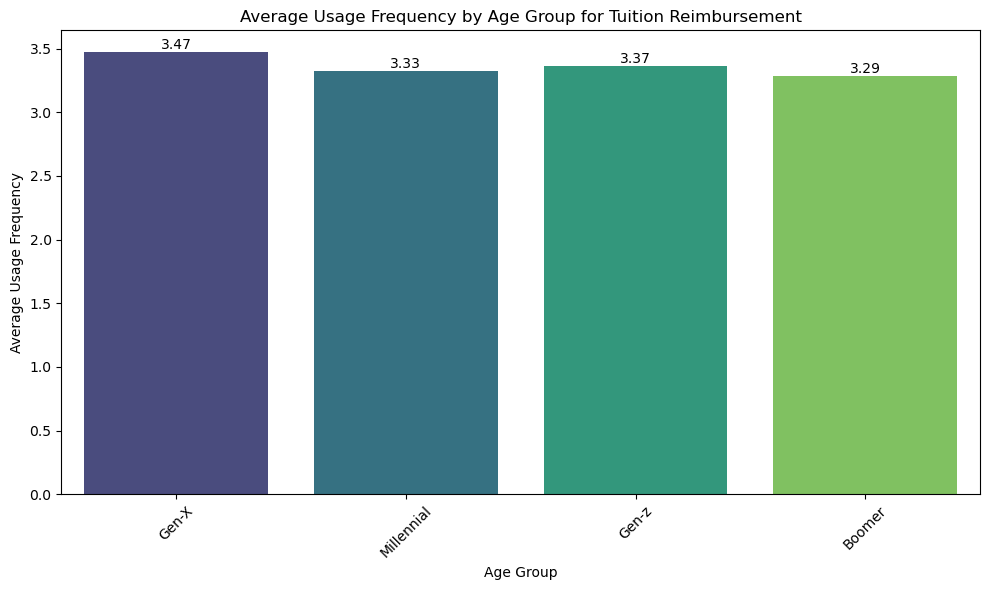

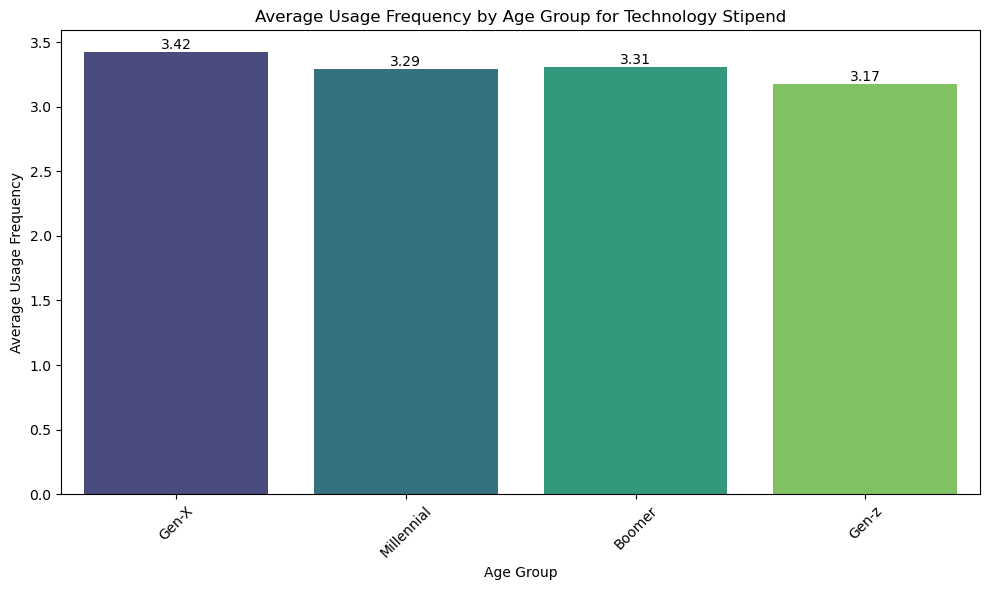

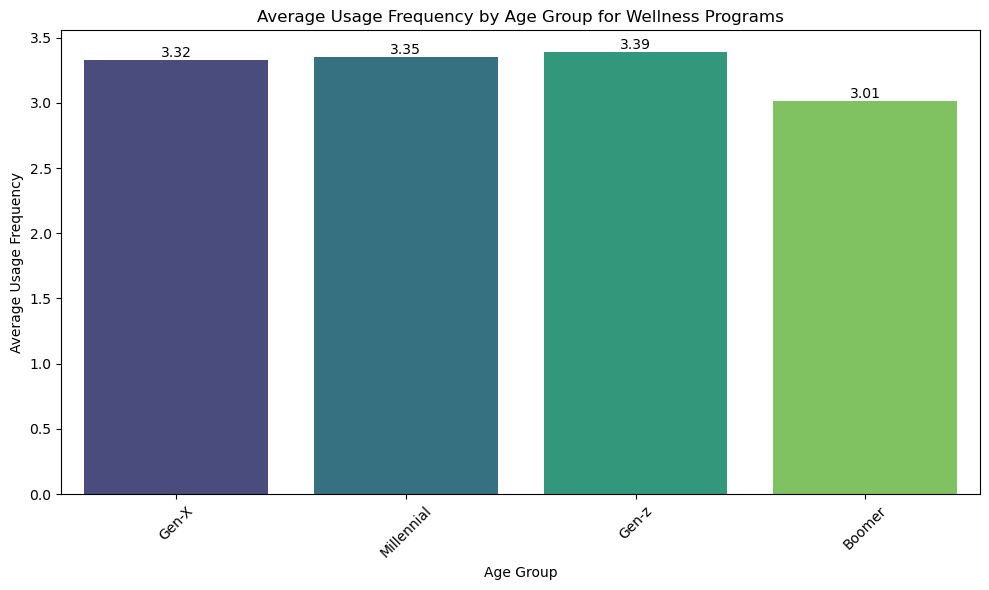

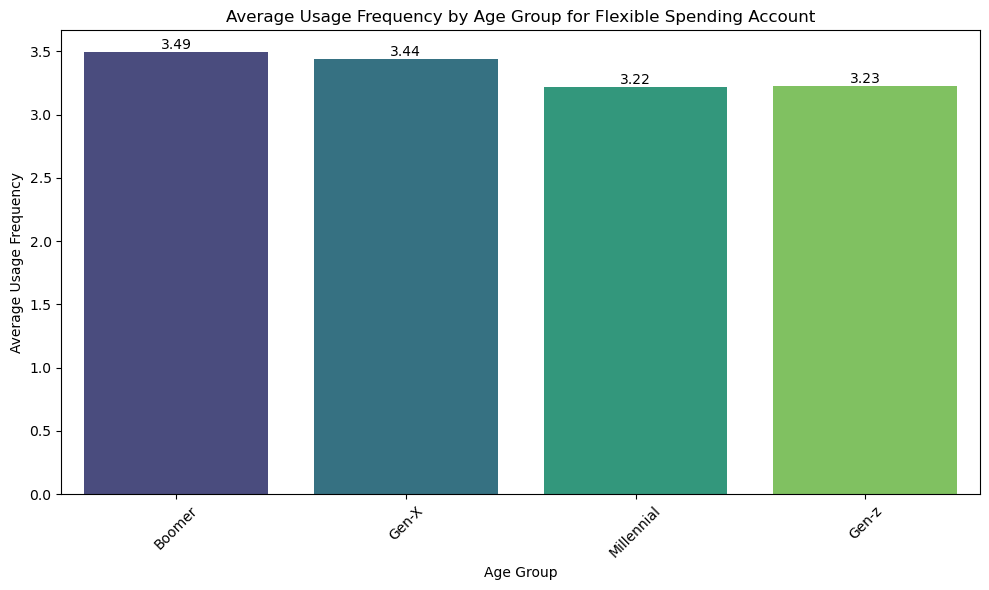

In [8]:
benefits = [
    'Professional Development', 'Retirement Plan', 'Health Insurance',
    'Cell Phone Allowance', 'Gym Membership', 'Commuter Benefits',
    'Life Insurance', 'Childcare', 'Tuition Reimbursement', 'Technology Stipend',
    'Wellness Programs', 'Flexible Spending Account'
]

plt.rcParams['patch.edgecolor'] = 'none'
plt.rcParams['patch.linewidth'] = 0

for benefit in benefits:
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        data=df[df['BenefitType'] == benefit],
        x='AgeGroup',
        y='UsageFrequency',
        estimator=np.mean,
        palette='viridis',
        errorbar=None  # removes error bars
    )
    
    # Annotate each bar with its average value
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2.,
            height,
            f'{height:.2f}',
            ha='center',
            va='bottom'
        )
    
    plt.title(f'Average Usage Frequency by Age Group for {benefit}')
    plt.xlabel('Age Group')
    plt.ylabel('Average Usage Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


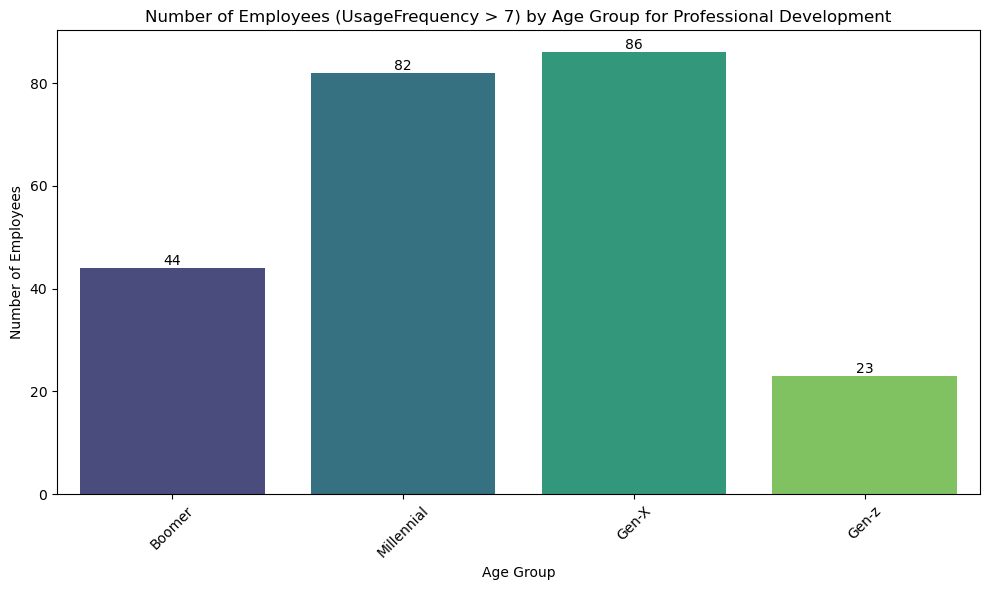

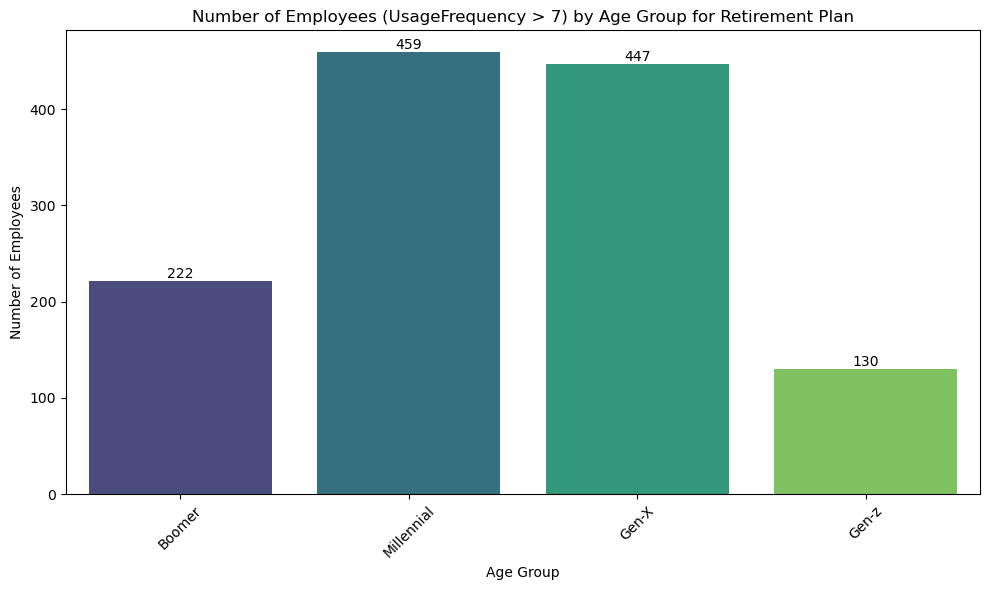

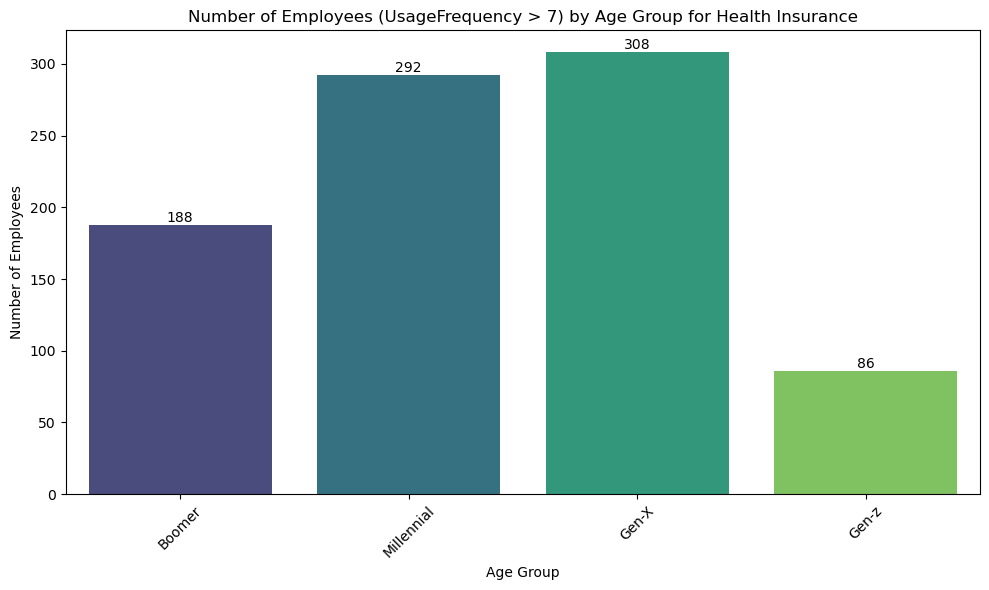

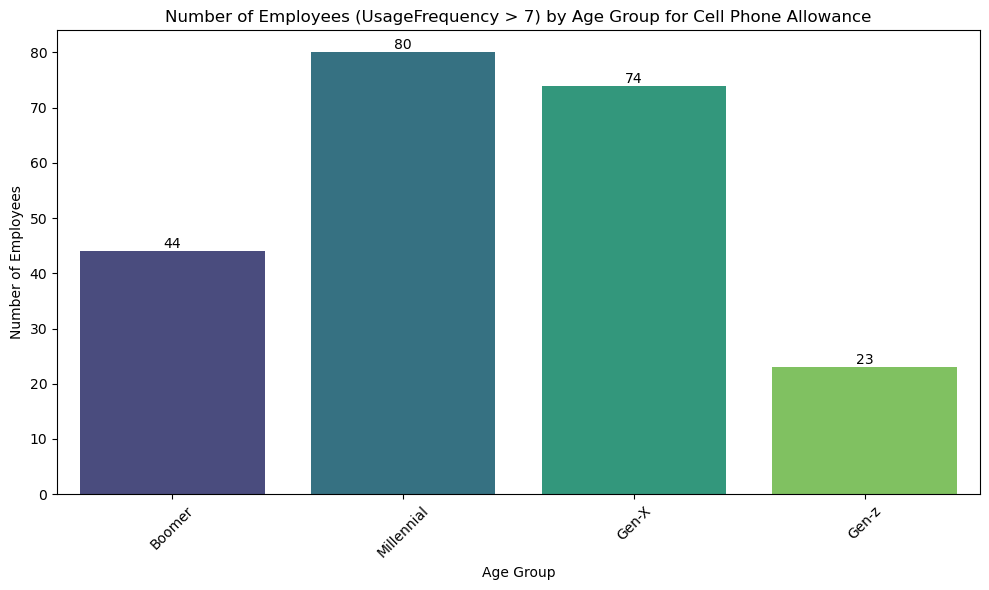

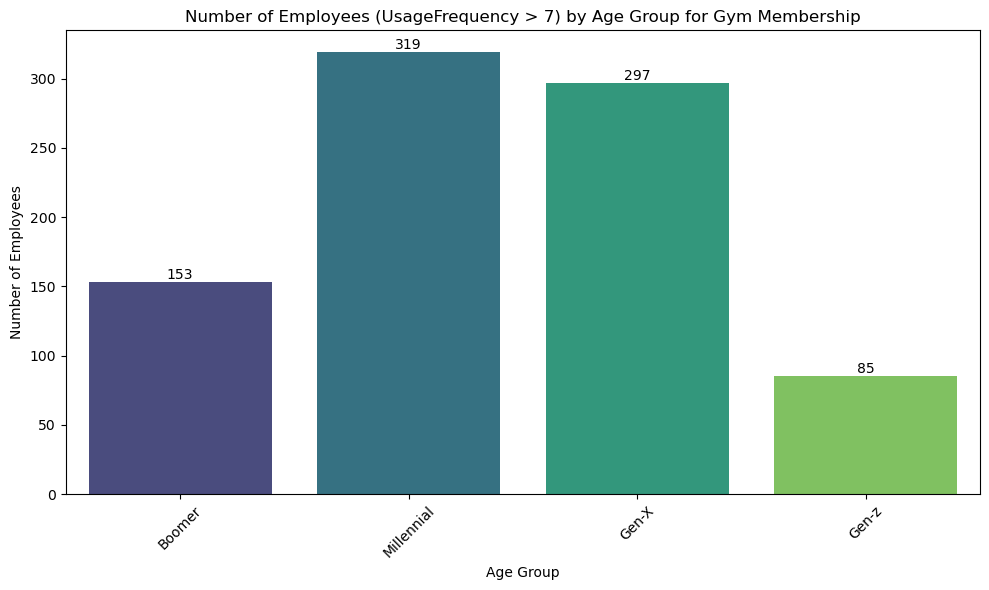

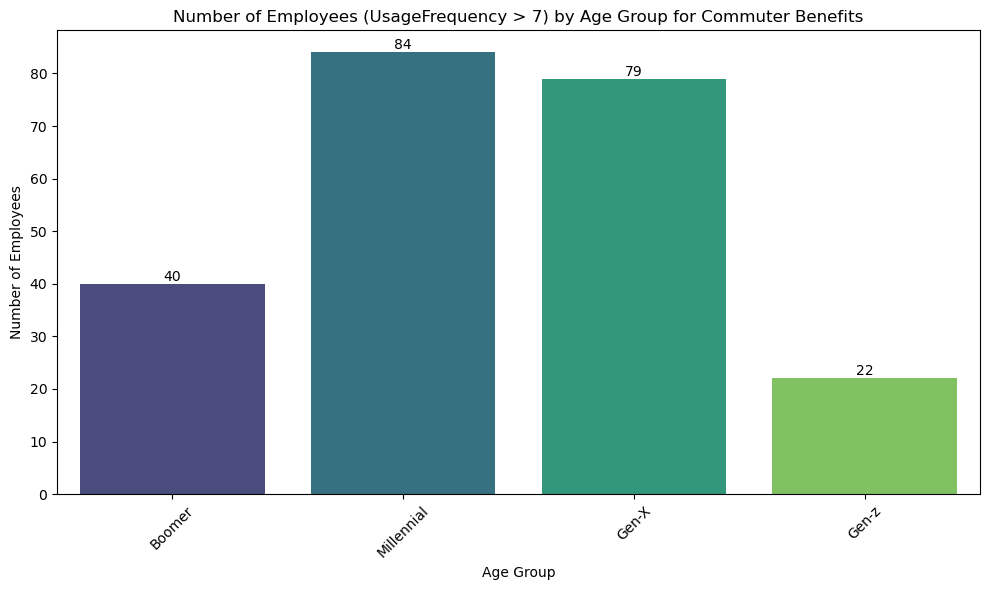

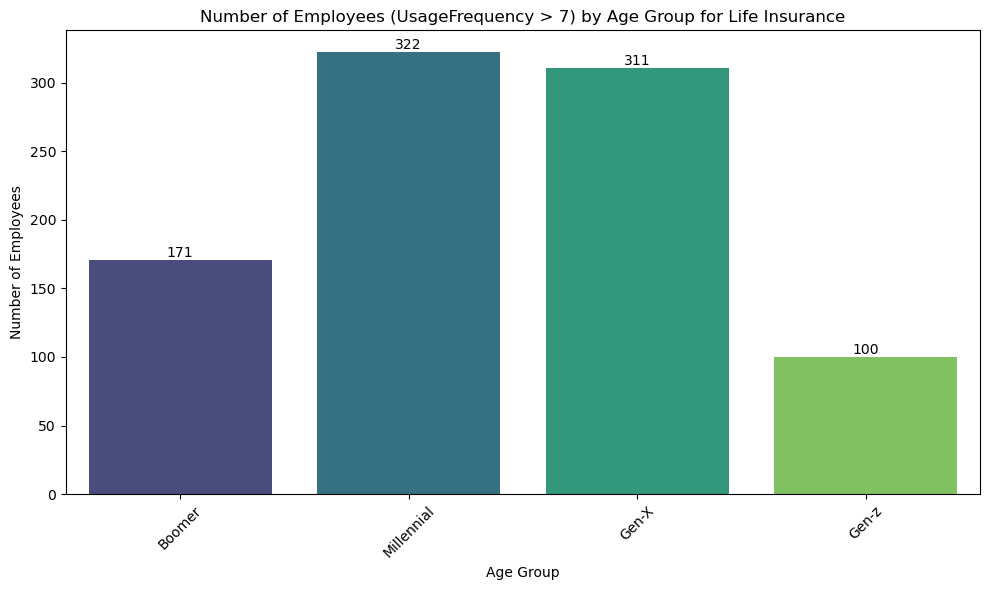

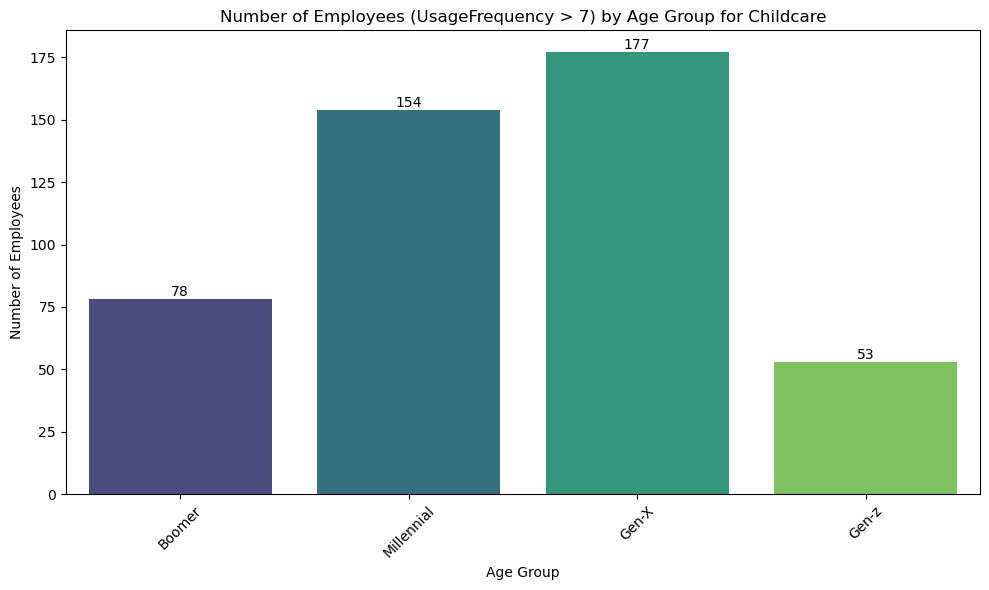

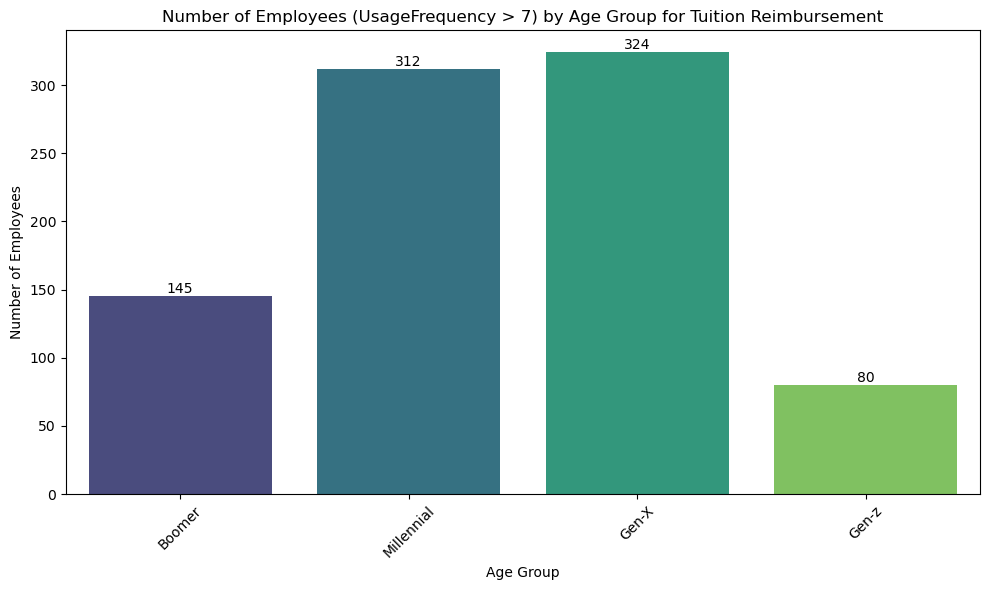

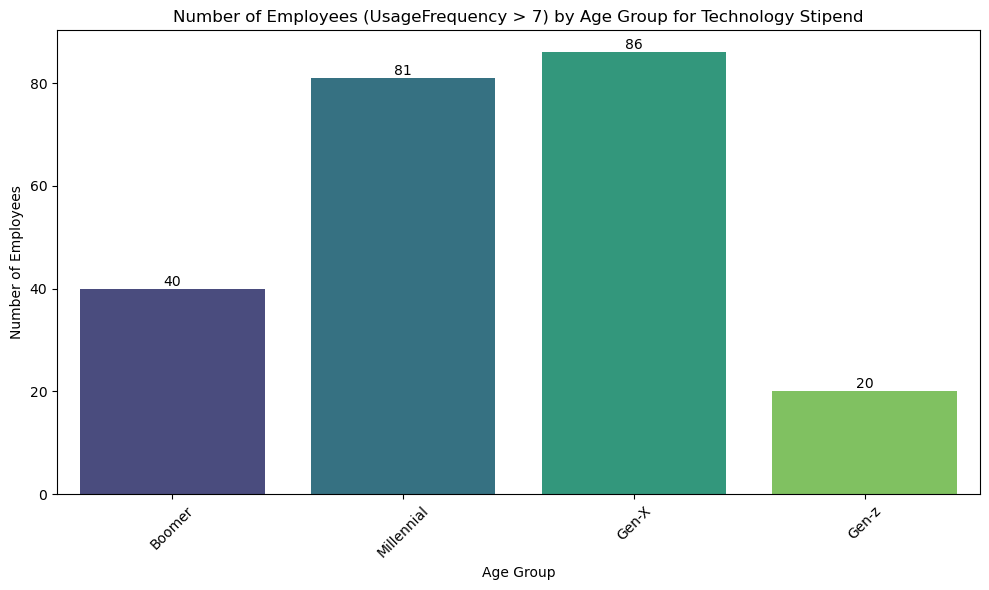

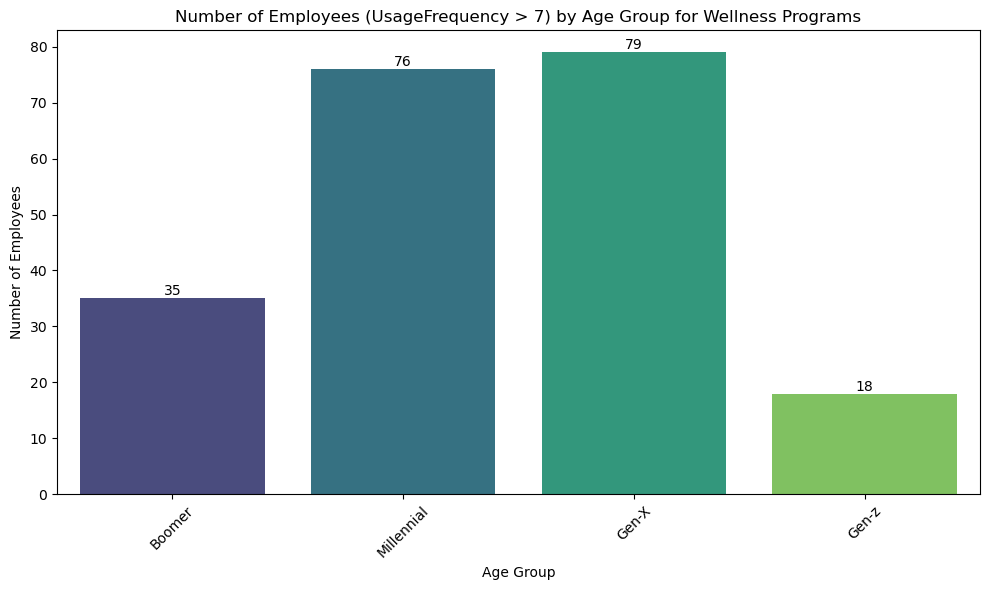

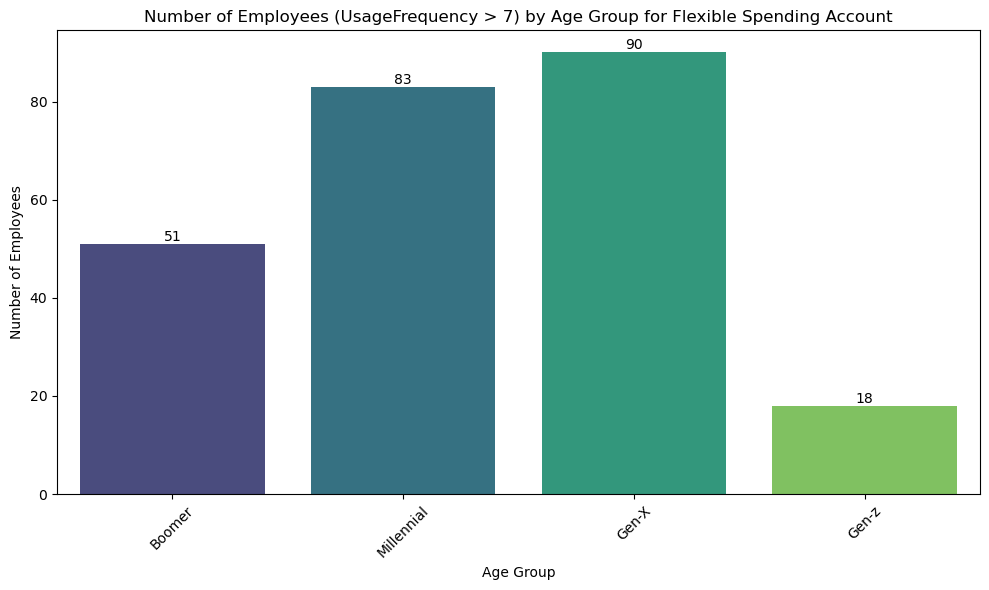

In [9]:
# count unique employees per BenefitType and AgeGroup where UsageFrequency > 7
filtered = df[df['UsageFrequency'] > 7]
counts = (
    filtered
    .groupby(['BenefitType', 'AgeGroup'])['EmployeeID']
    .nunique()
    .reset_index(name='Count')
)

age_order = df['AgeGroup'].unique()  # preserve existing age group order

plt.rcParams['patch.edgecolor'] = 'none'
plt.rcParams['patch.linewidth'] = 0

for benefit in benefits:
    subset = counts[counts['BenefitType'] == benefit].set_index('AgeGroup')
    subset = subset.reindex(age_order, fill_value=0).reset_index()
    
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=subset, x='AgeGroup', y='Count', palette='viridis', errorbar=None)
    for p in ax.patches:
        h = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., h, int(h), ha='center', va='bottom')
    plt.title(f'Number of Employees (UsageFrequency > 7) by Age Group for {benefit}')
    plt.xlabel('Age Group')
    plt.ylabel('Number of Employees')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

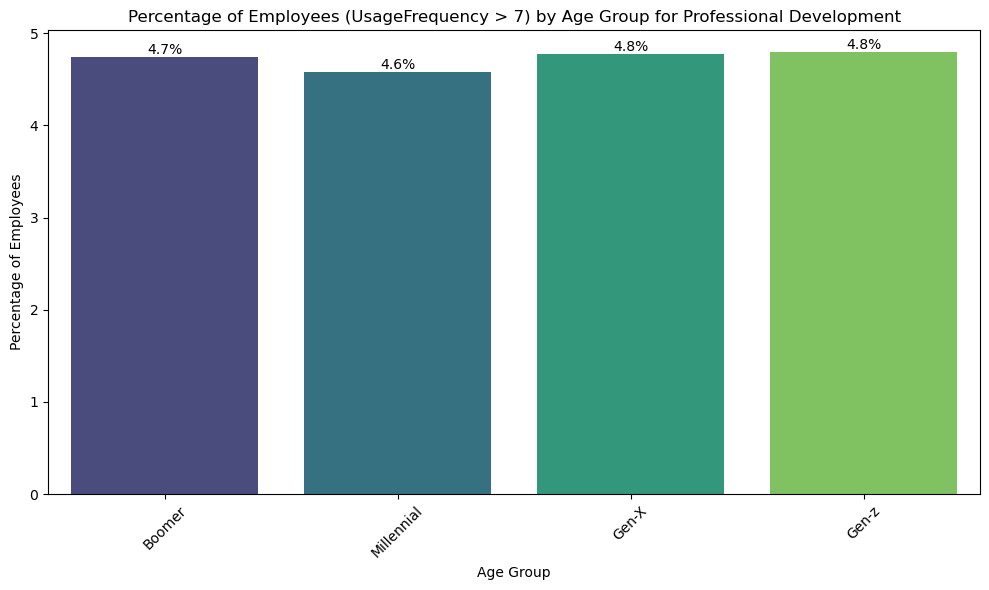

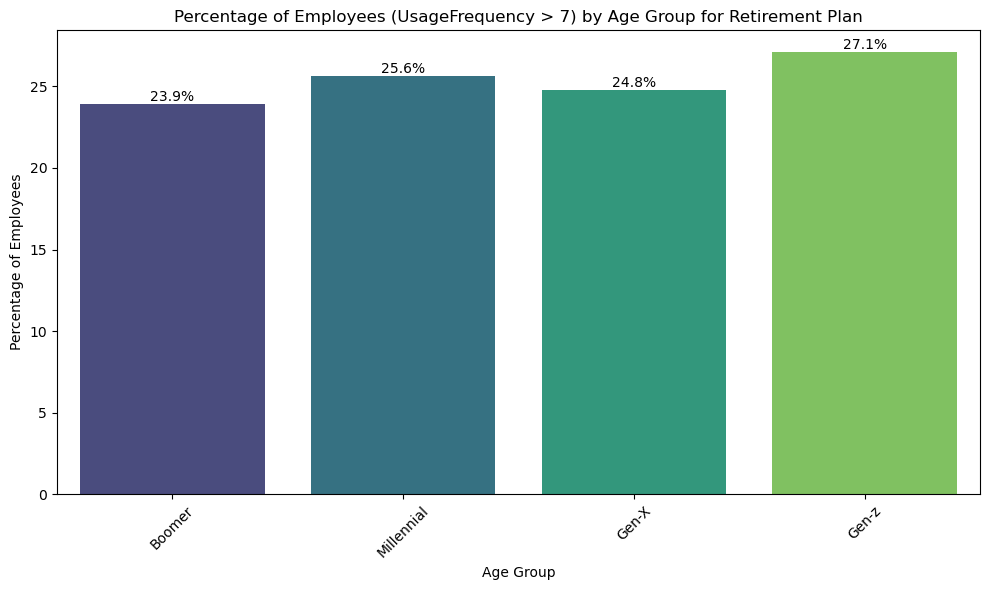

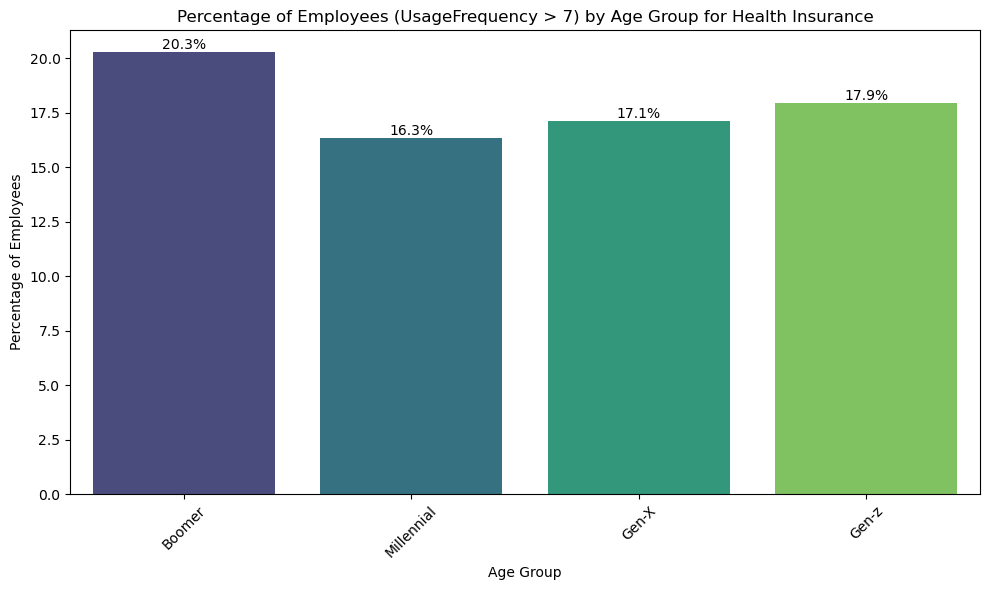

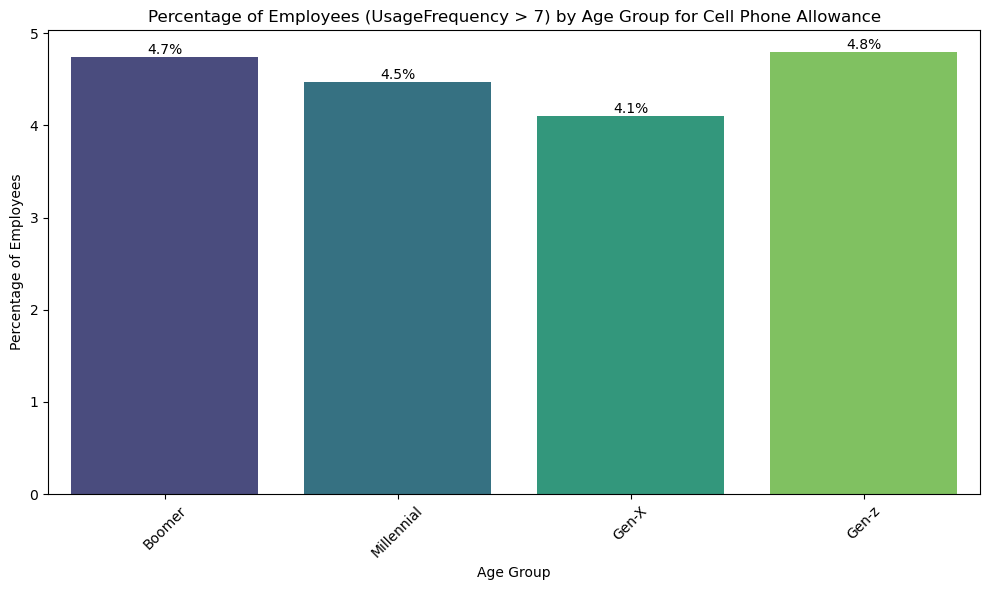

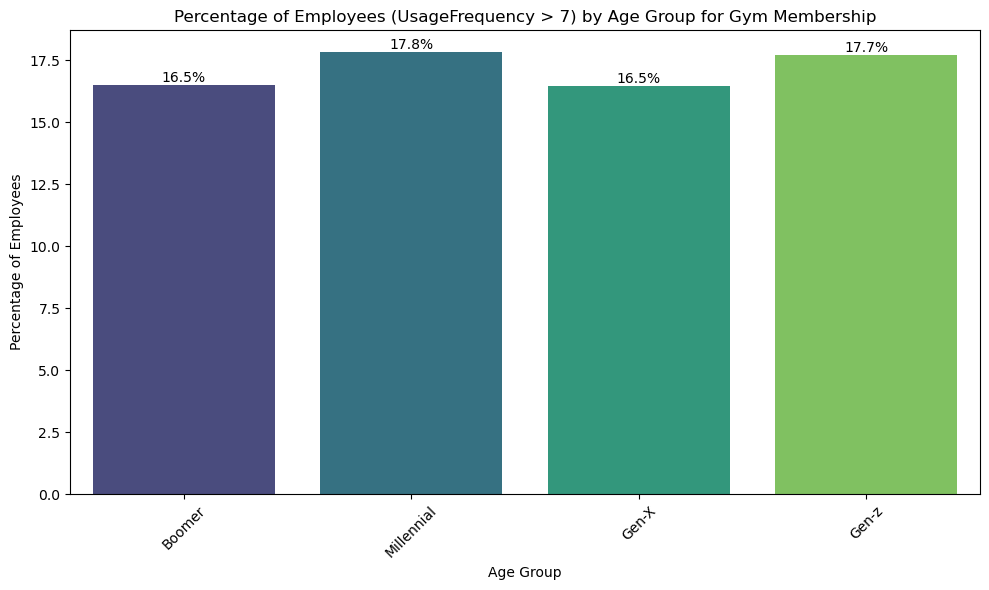

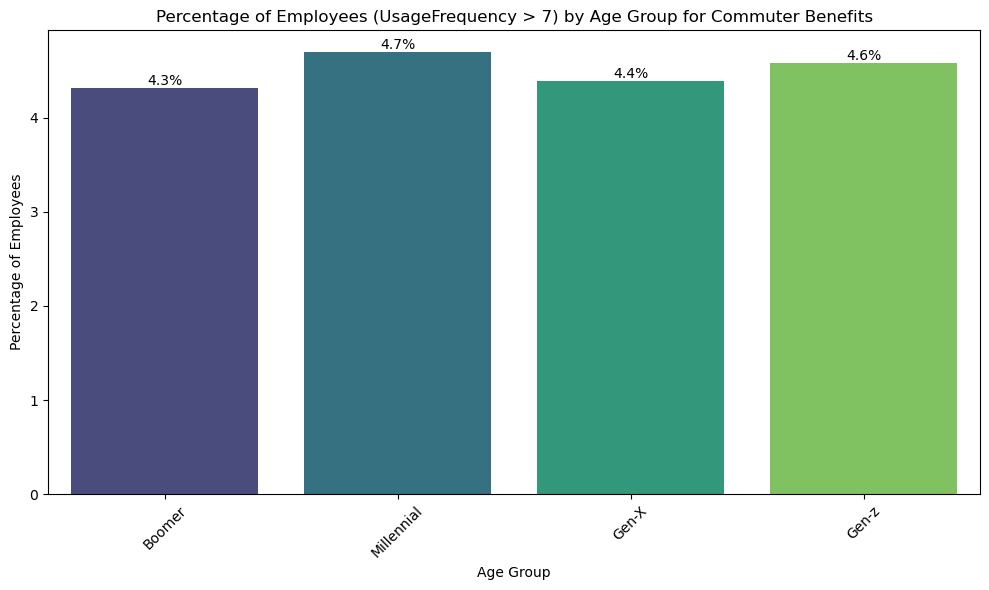

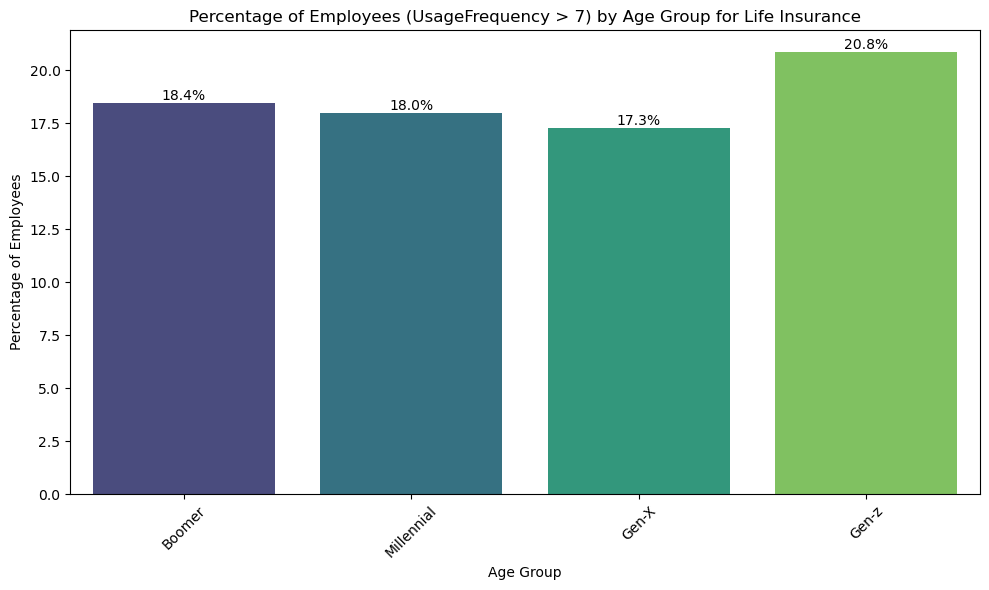

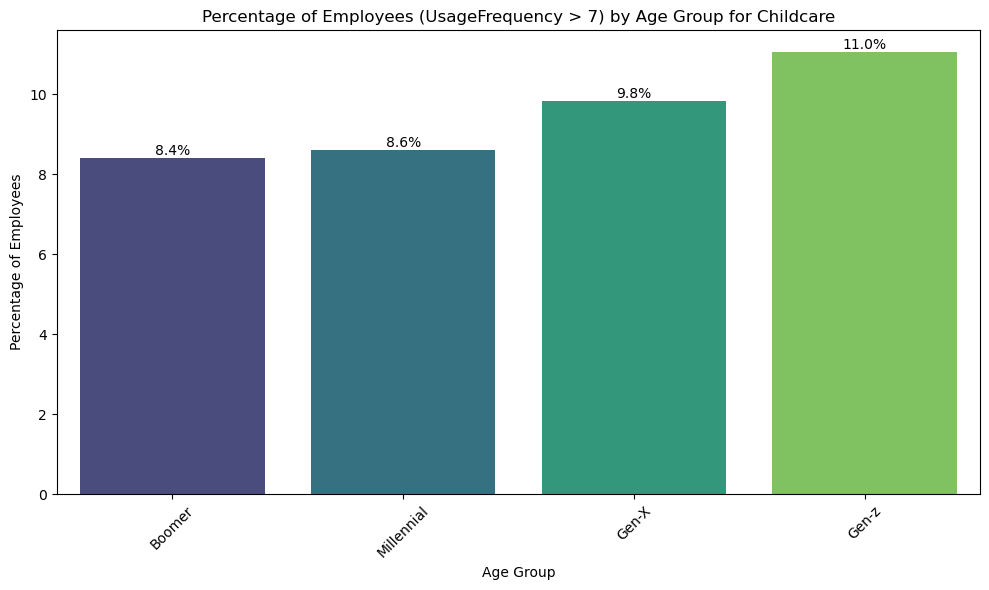

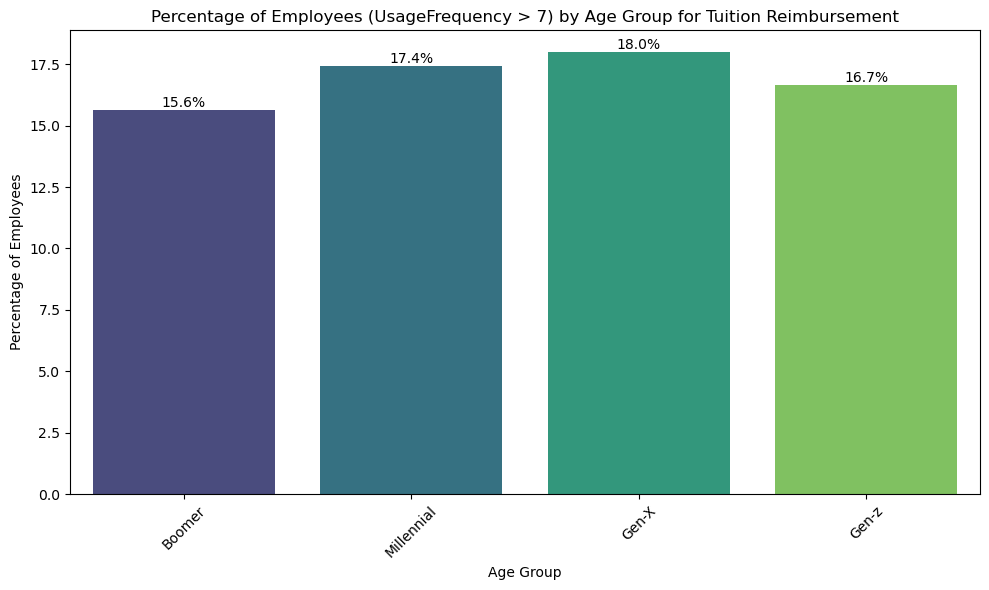

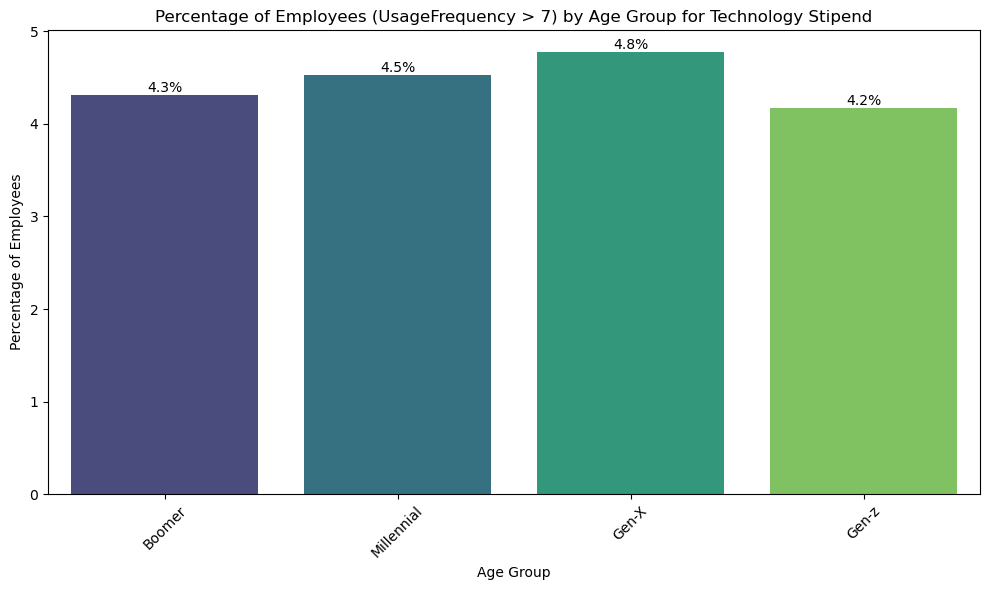

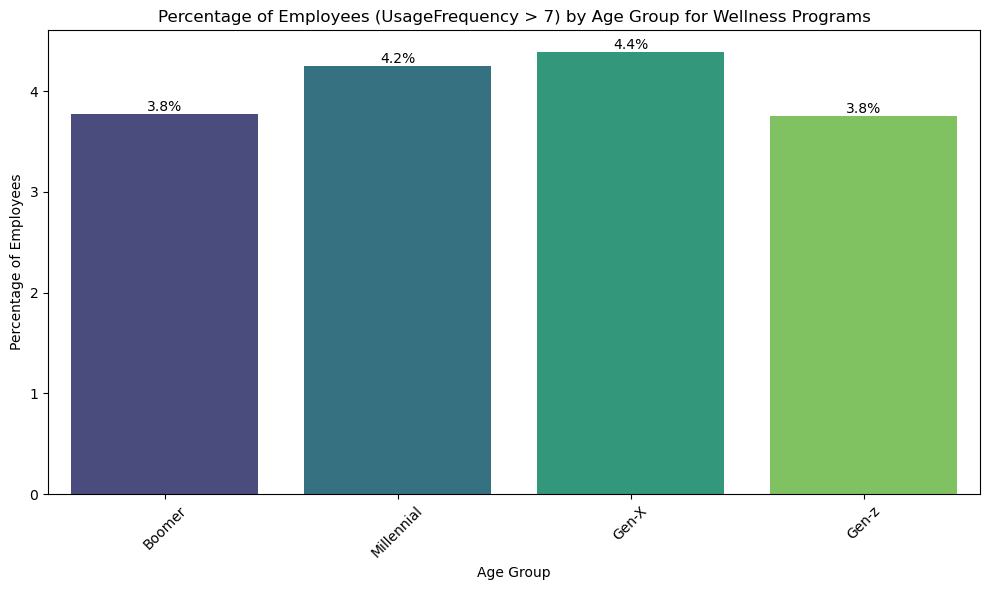

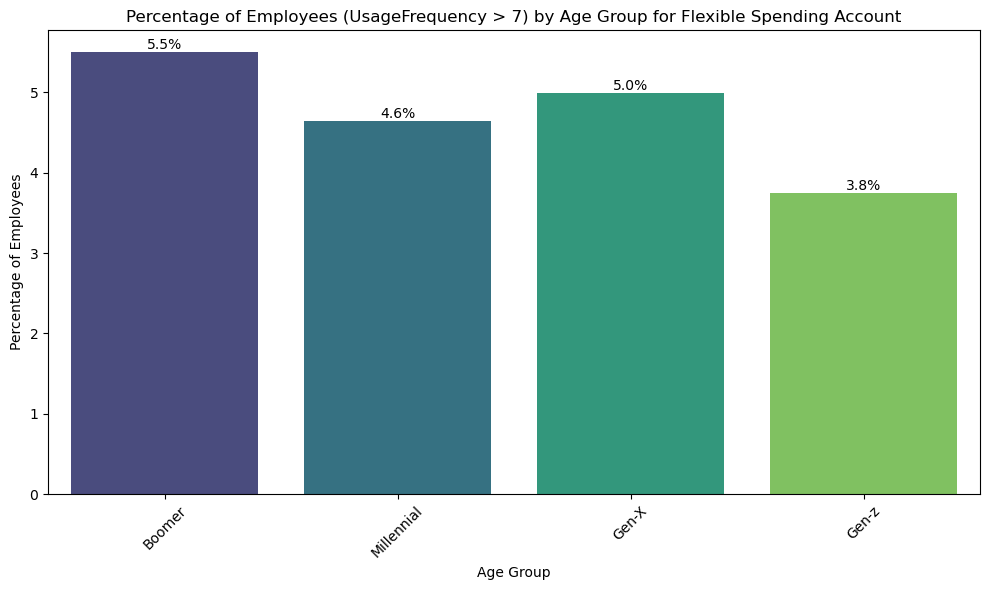

In [12]:
# Filter employees with UsageFrequency > 7
filtered = df[df['UsageFrequency'] > 7]

# Count unique employees per BenefitType + AgeGroup
counts = (
    filtered
    .groupby(['BenefitType', 'AgeGroup'])['EmployeeID']
    .nunique()
    .reset_index(name='Count')
)

# Total employees per AgeGroup (for denominator)
totals = (
    df.groupby('AgeGroup')['EmployeeID']
    .nunique()
    .reset_index(name='Total')
)

# Merge counts with totals to compute percentages
counts = counts.merge(totals, on='AgeGroup', how='left')
counts['Percentage'] = (counts['Count'] / counts['Total']) * 100

age_order = df['AgeGroup'].unique()  # preserve order

plt.rcParams['patch.edgecolor'] = 'none'
plt.rcParams['patch.linewidth'] = 0

for benefit in benefits:
    subset = counts[counts['BenefitType'] == benefit].set_index('AgeGroup')
    subset = subset.reindex(age_order, fill_value=0).reset_index()
    
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        data=subset,
        x='AgeGroup',
        y='Percentage',
        palette='viridis',
        errorbar=None
    )
    
    # Annotate with percentages
    for p in ax.patches:
        h = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2., 
            h, 
            f"{h:.1f}%", 
            ha='center', 
            va='bottom'
        )
    
    plt.title(f'Percentage of Employees (UsageFrequency > 7) by Age Group for {benefit}')
    plt.xlabel('Age Group')
    plt.ylabel('Percentage of Employees')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### Gender

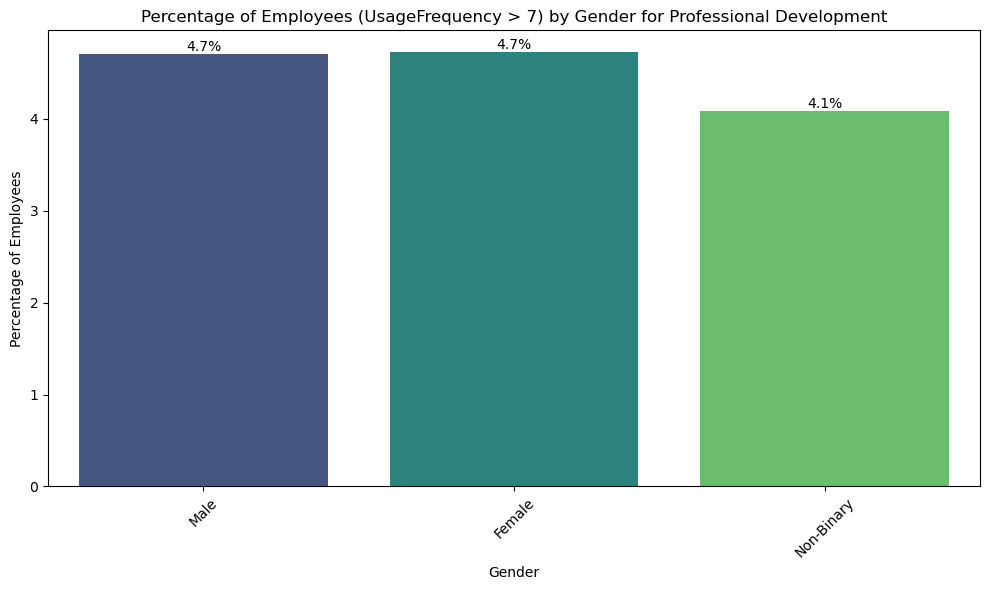

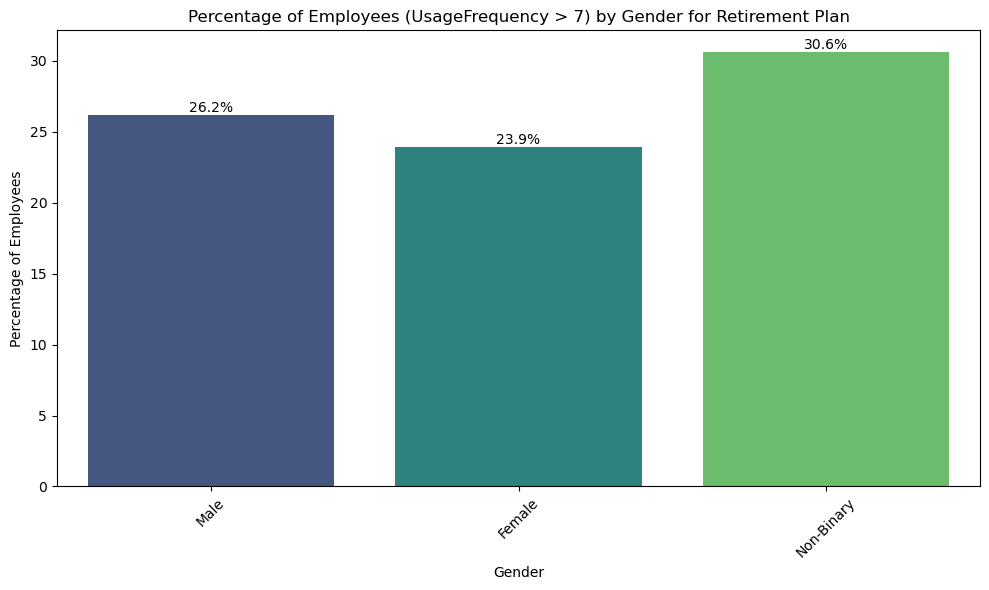

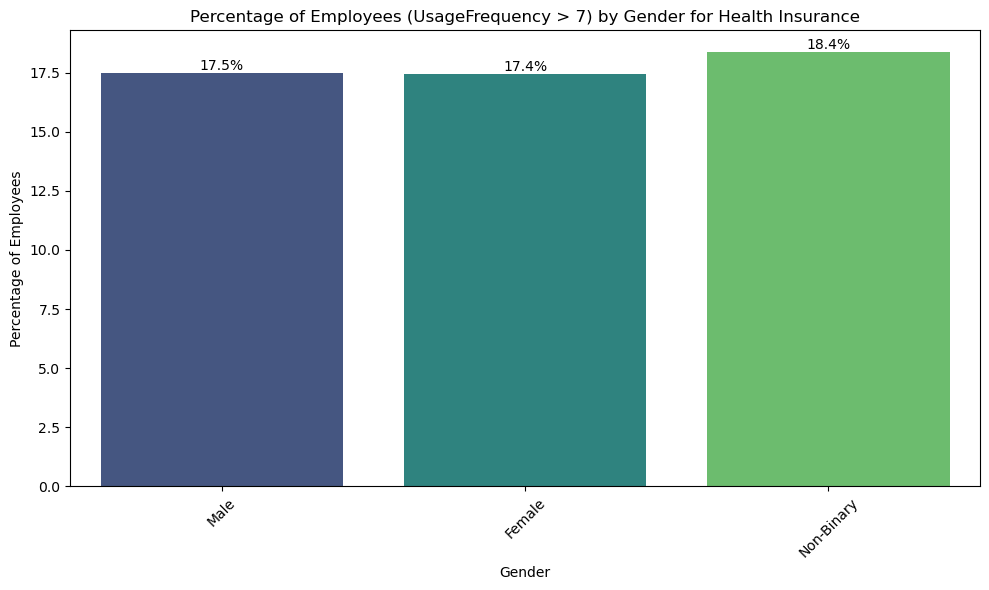

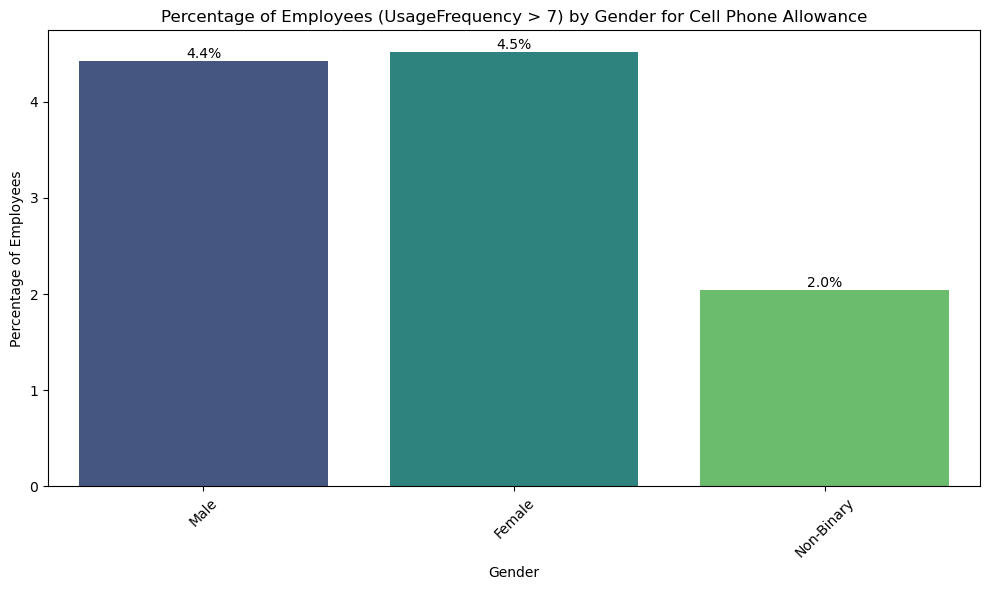

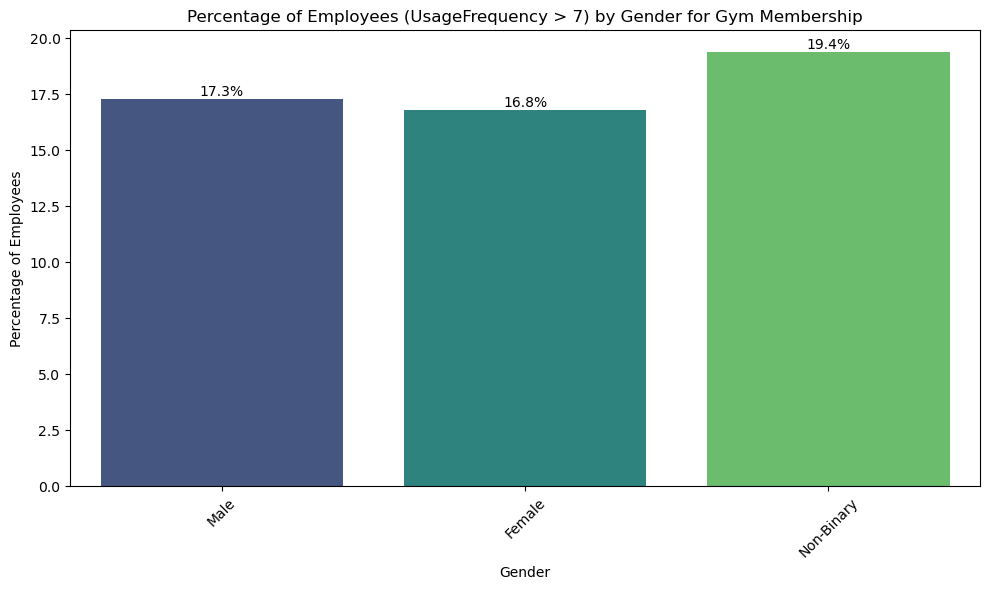

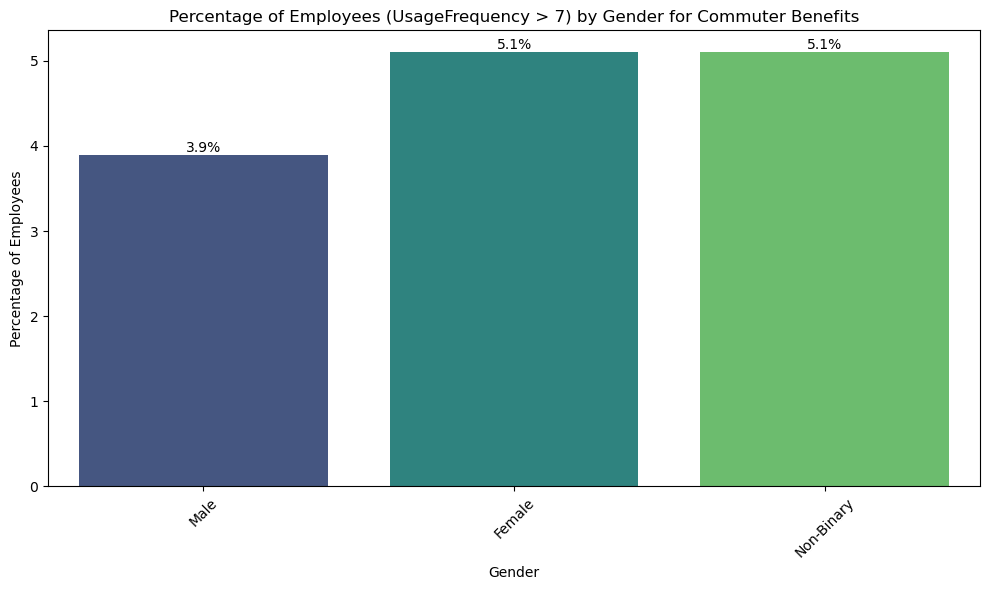

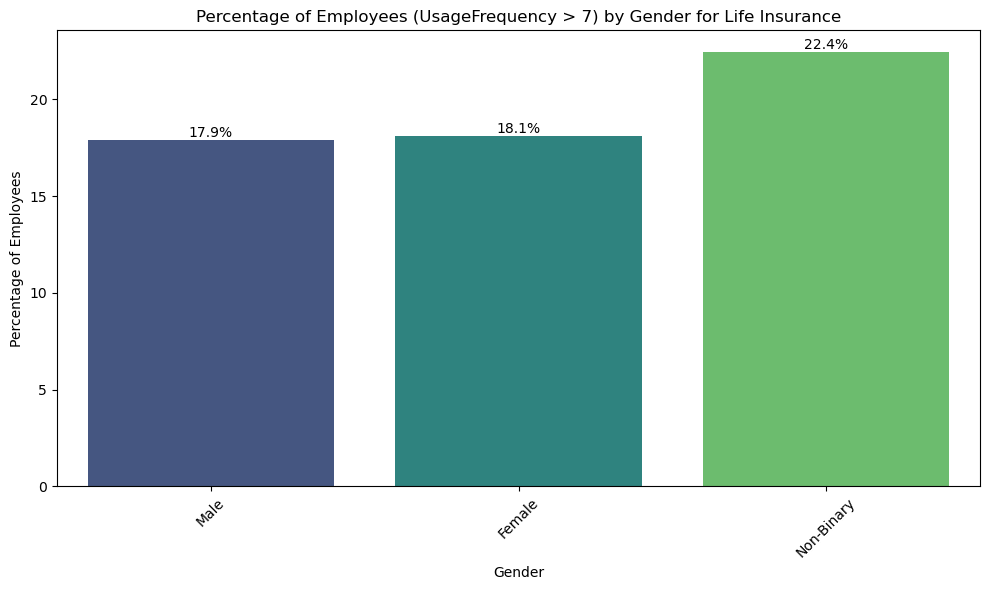

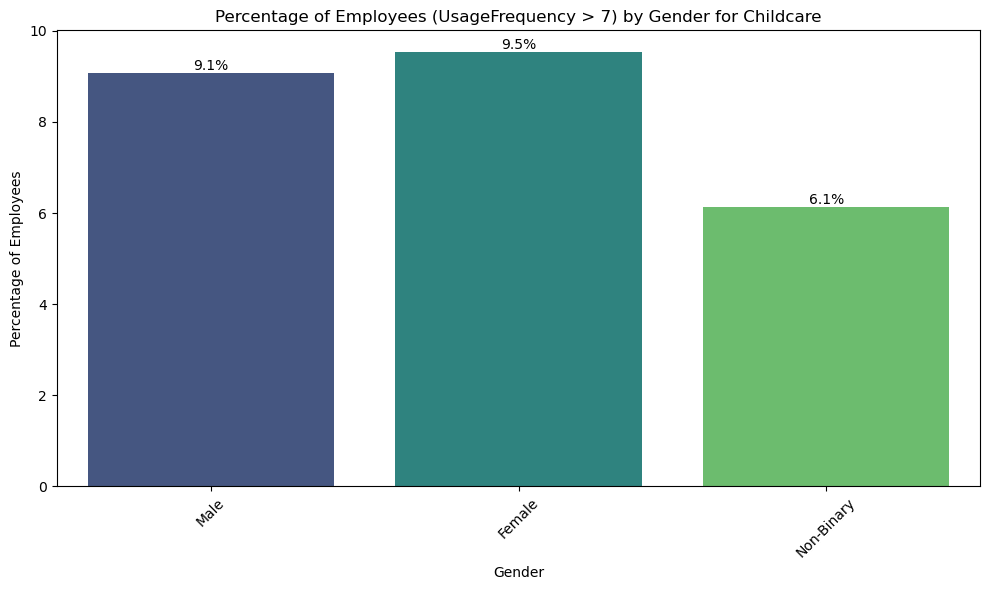

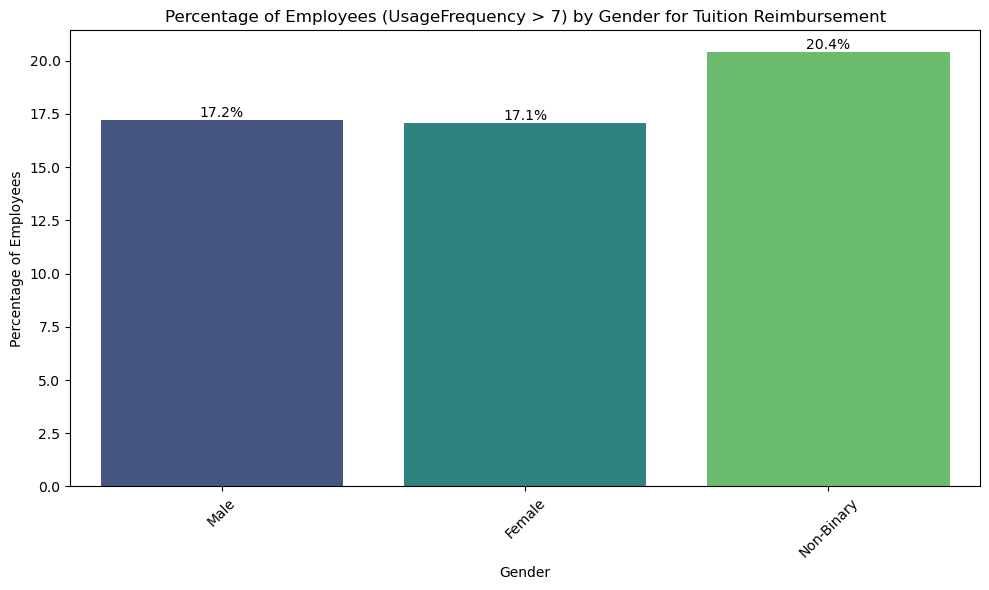

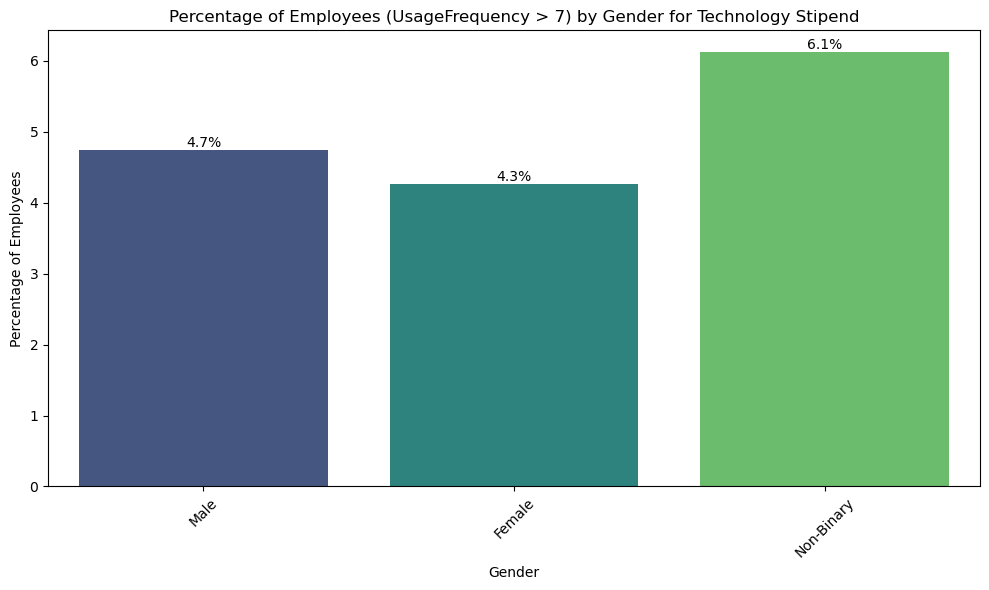

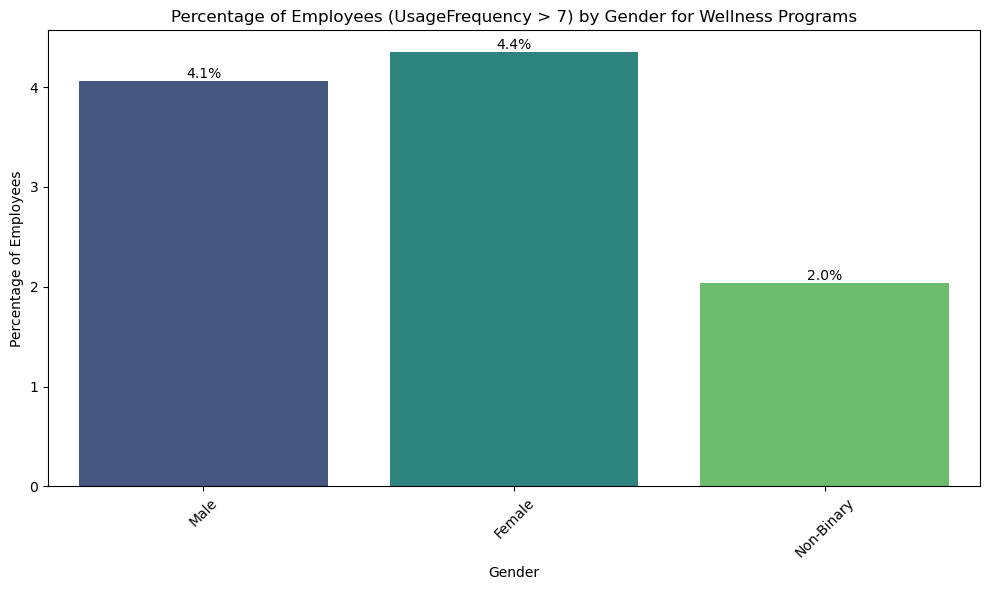

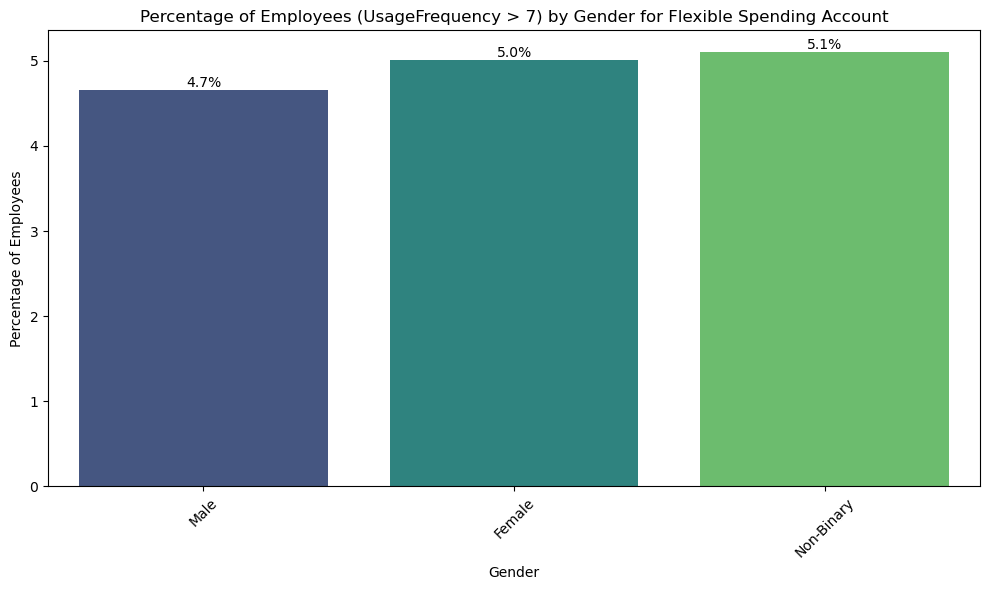

In [13]:
# Filter employees with UsageFrequency > 7
filtered = df[df['UsageFrequency'] > 7]

# Count unique employees per BenefitType + Gender
counts = (
    filtered
    .groupby(['BenefitType', 'Gender'])['EmployeeID']
    .nunique()
    .reset_index(name='Count')
)

# Total employees per Gender (denominator)
totals = (
    df.groupby('Gender')['EmployeeID']
    .nunique()
    .reset_index(name='Total')
)

# Merge counts with totals to compute percentages
counts = counts.merge(totals, on='Gender', how='left')
counts['Percentage'] = (counts['Count'] / counts['Total']) * 100

gender_order = df['Gender'].unique()  # preserve dataset order

plt.rcParams['patch.edgecolor'] = 'none'
plt.rcParams['patch.linewidth'] = 0

for benefit in benefits:
    subset = counts[counts['BenefitType'] == benefit].set_index('Gender')
    subset = subset.reindex(gender_order, fill_value=0).reset_index()
    
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        data=subset,
        x='Gender',
        y='Percentage',
        palette='viridis',
        errorbar=None
    )
    
    # Annotate with percentages
    for p in ax.patches:
        h = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2., 
            h, 
            f"{h:.1f}%", 
            ha='center', 
            va='bottom'
        )
    
    plt.title(f'Percentage of Employees (UsageFrequency > 7) by Gender for {benefit}')
    plt.xlabel('Gender')
    plt.ylabel('Percentage of Employees')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### Department

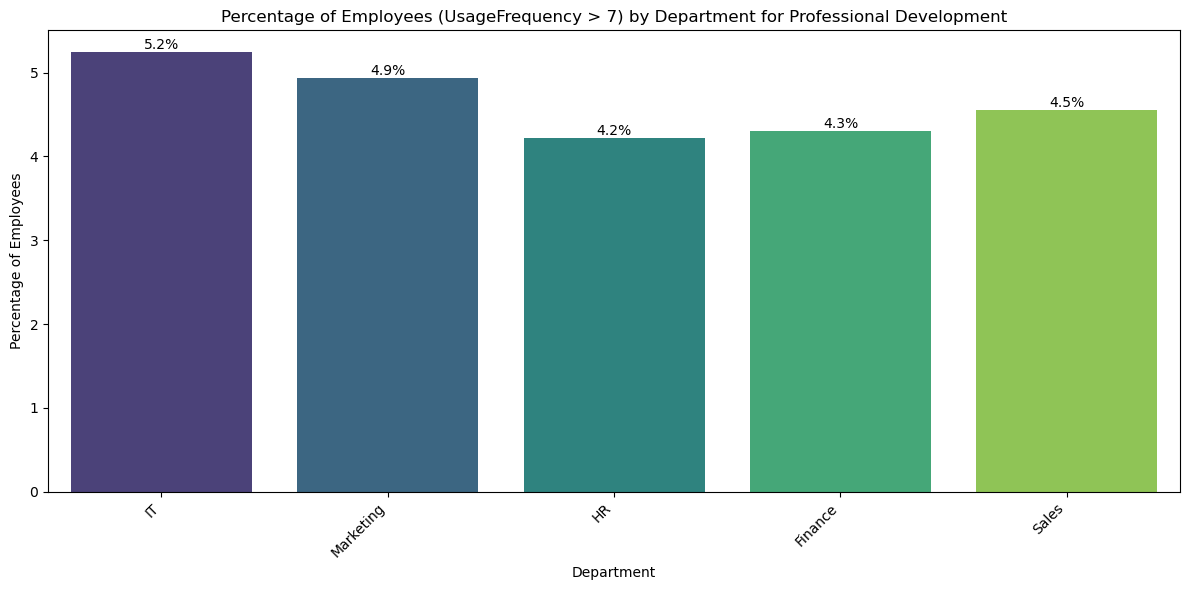

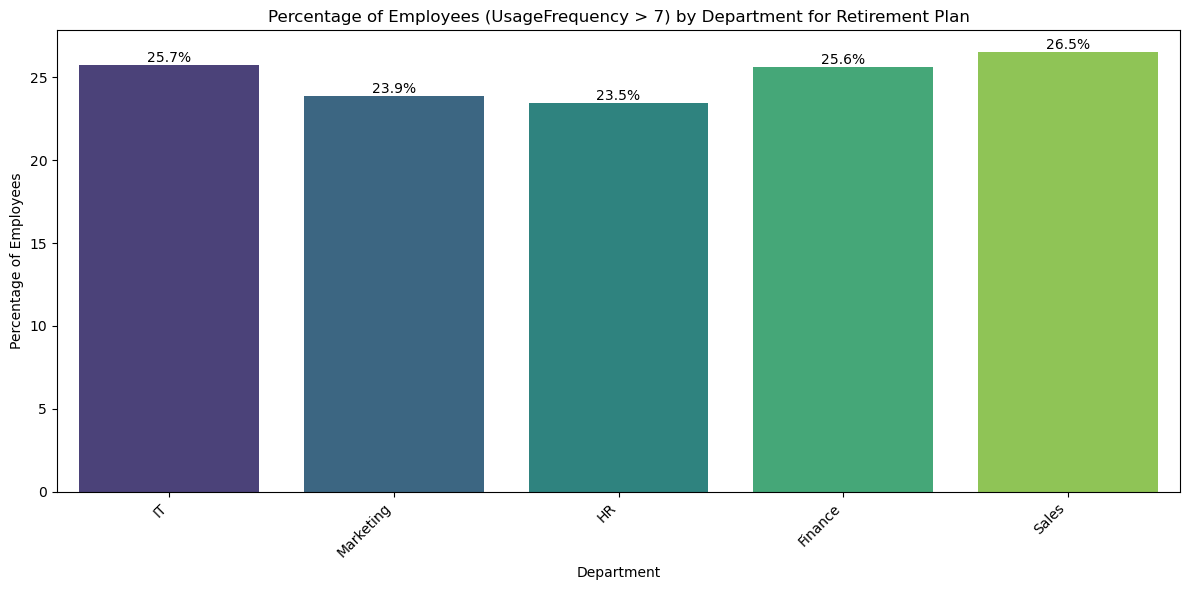

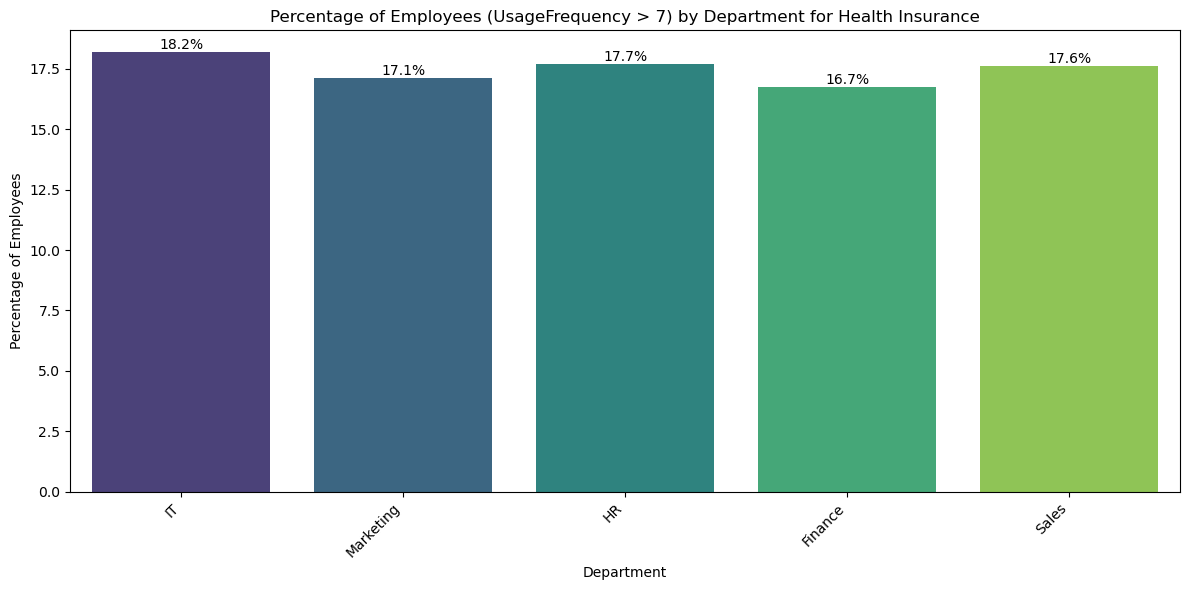

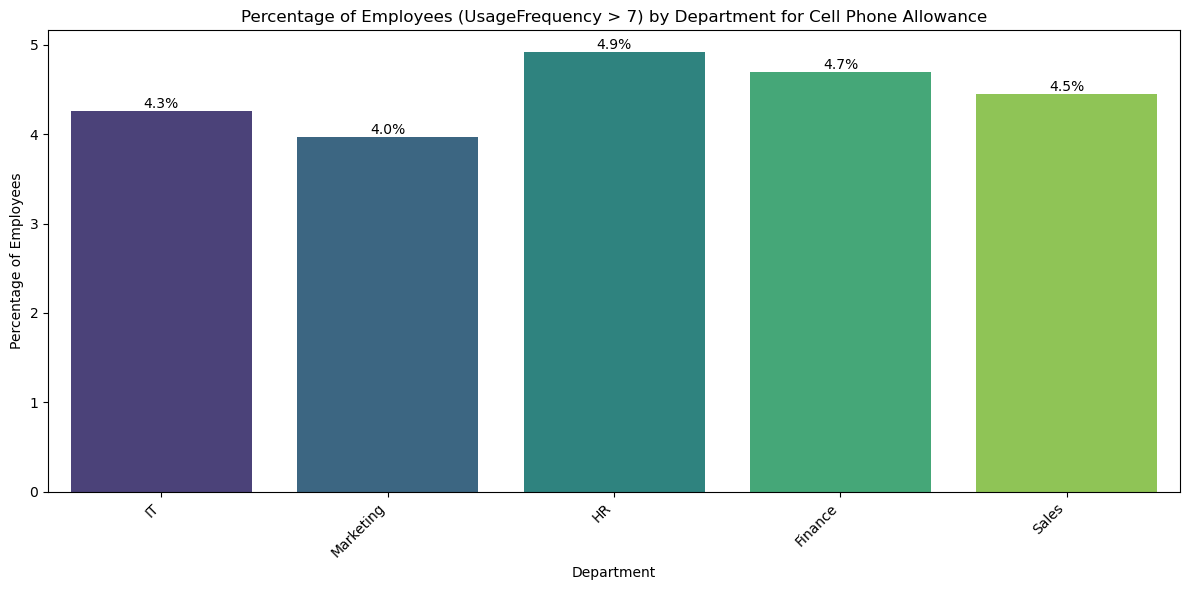

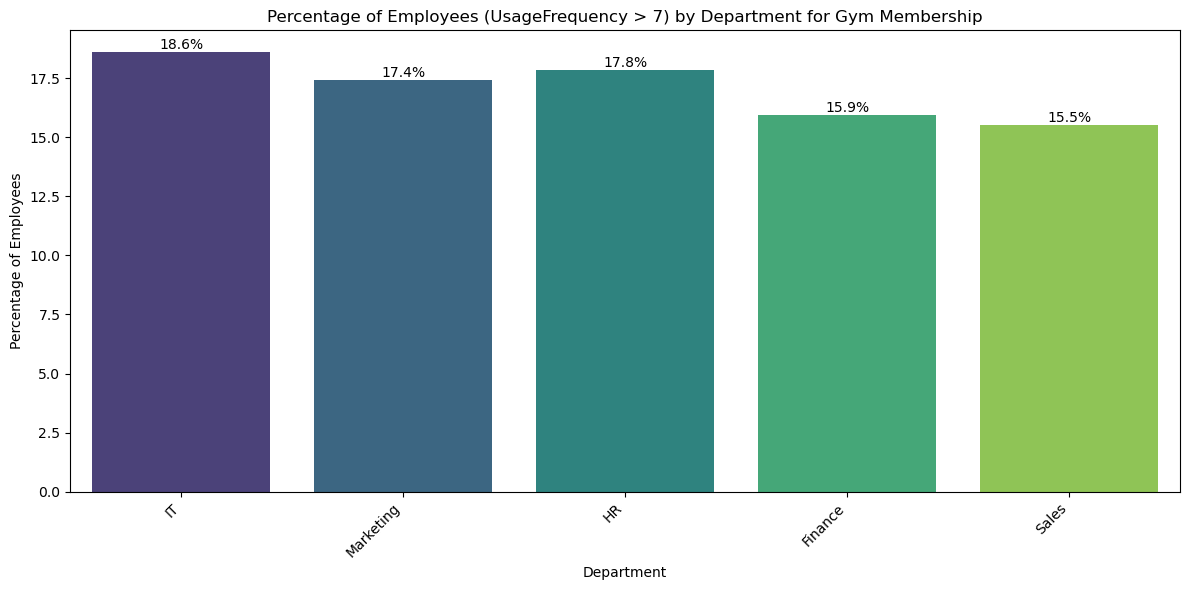

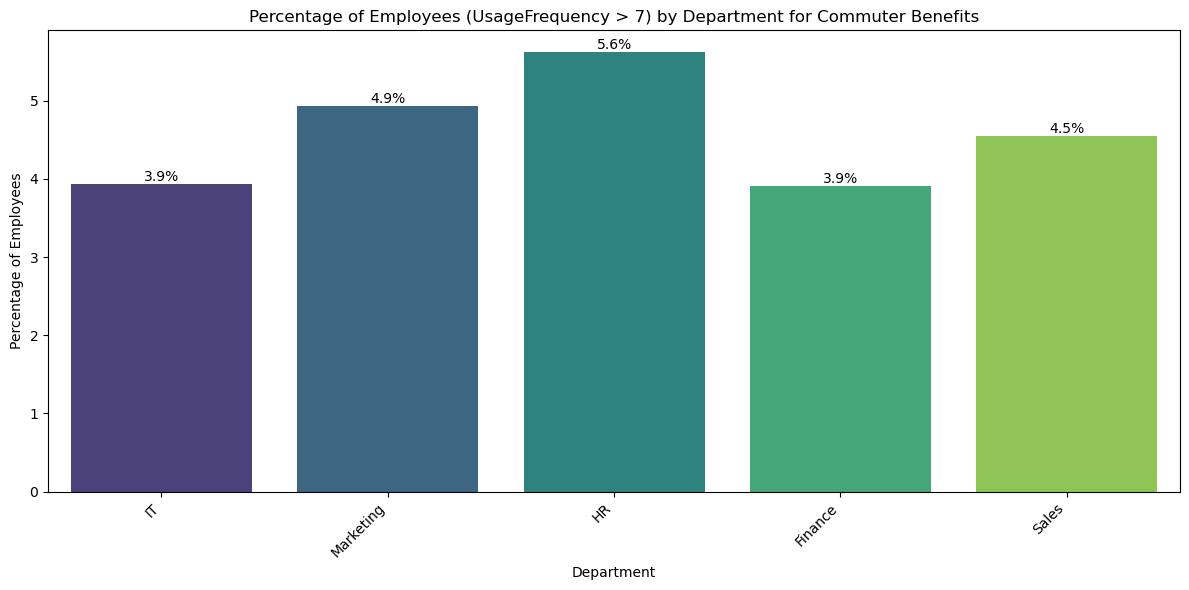

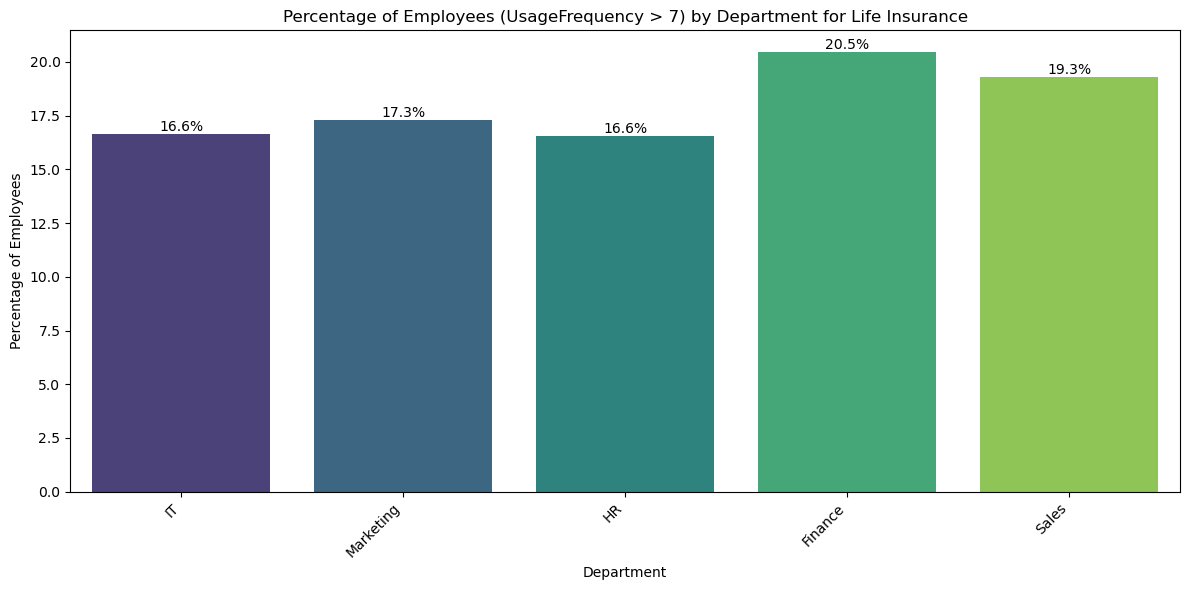

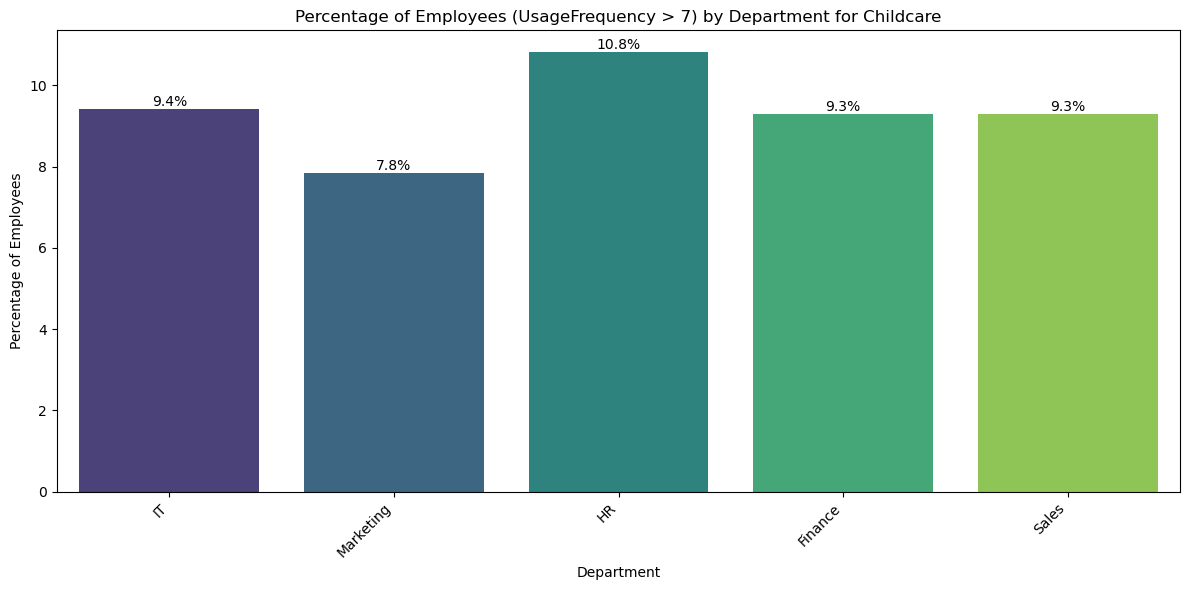

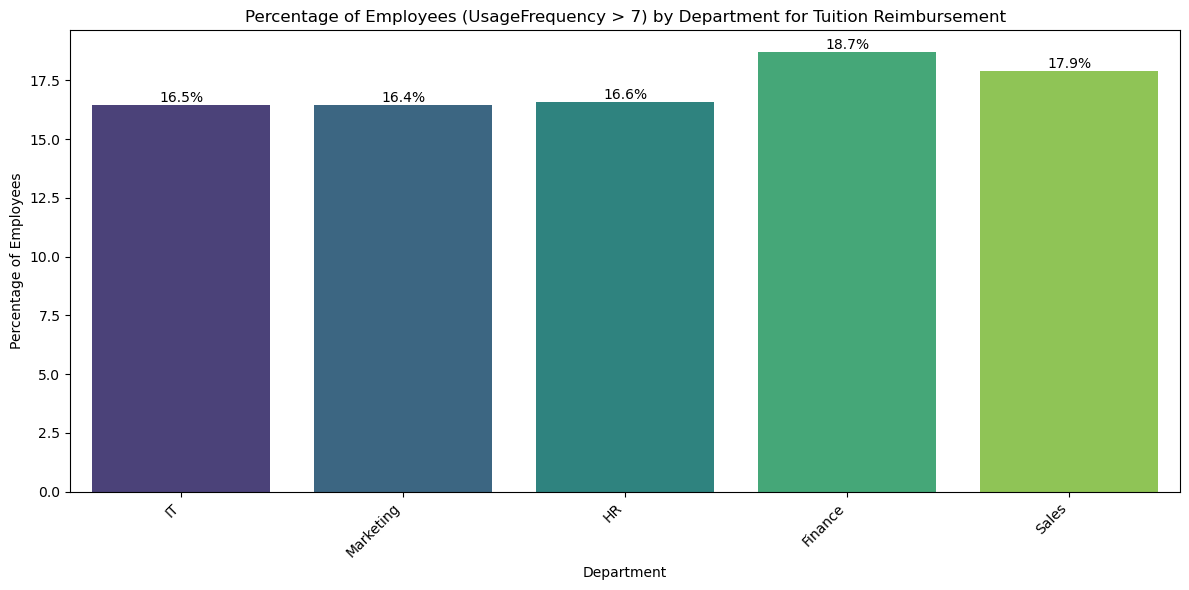

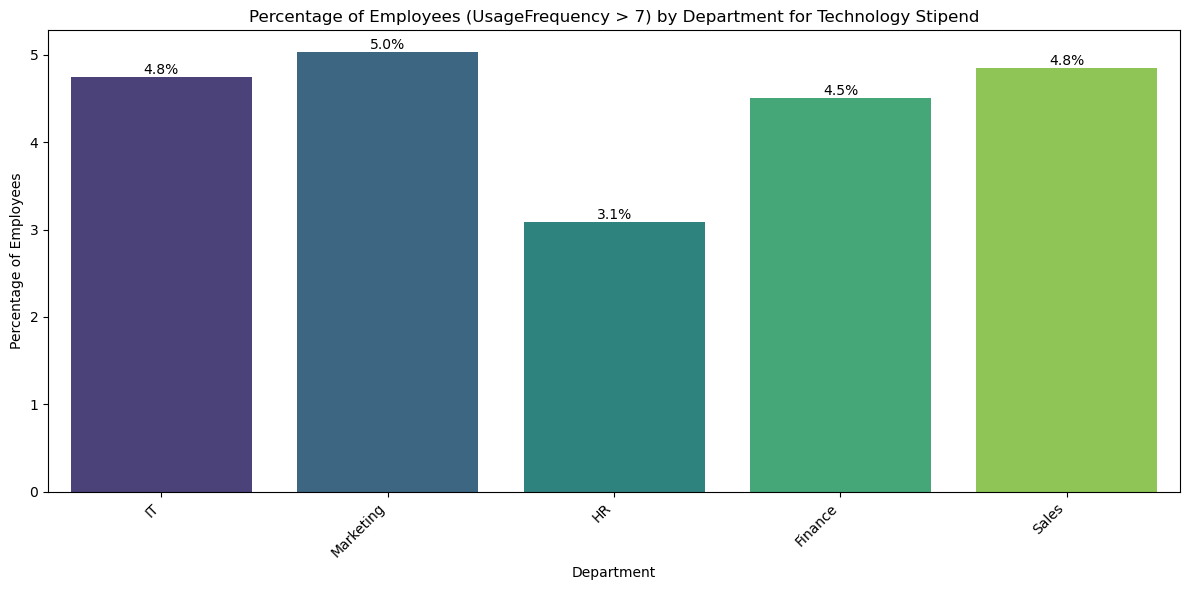

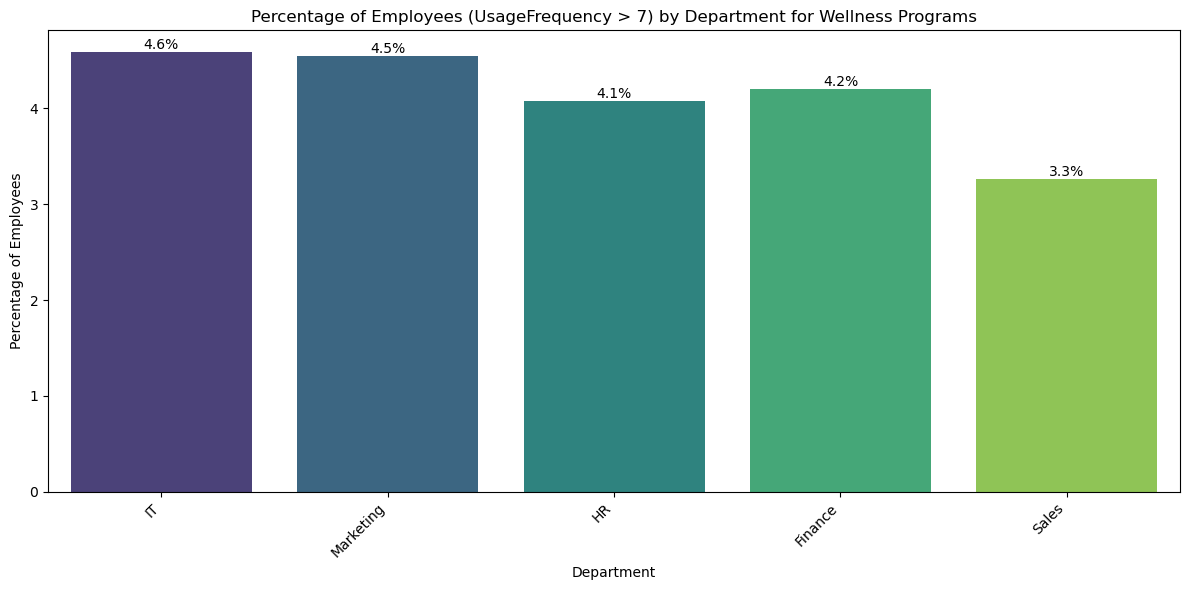

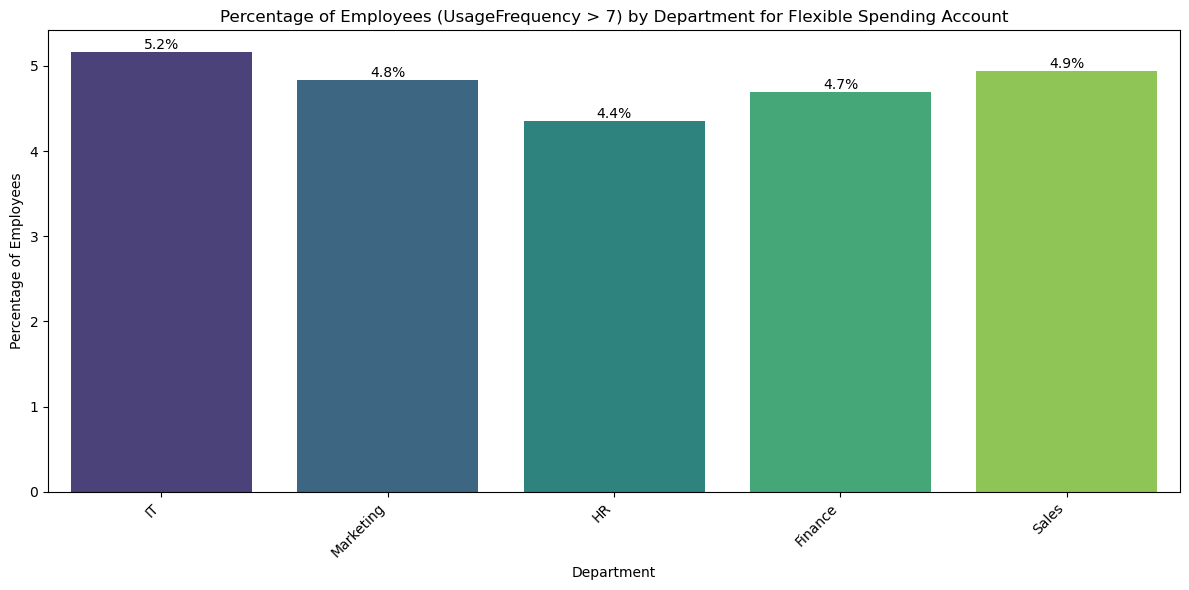

In [14]:
# Filter employees with UsageFrequency > 7
filtered = df[df['UsageFrequency'] > 7]

# Count unique employees per BenefitType + Department
counts = (
    filtered
    .groupby(['BenefitType', 'Department'])['EmployeeID']
    .nunique()
    .reset_index(name='Count')
)

# Total employees per Department (denominator)
totals = (
    df.groupby('Department')['EmployeeID']
    .nunique()
    .reset_index(name='Total')
)

# Merge counts with totals to compute percentages
counts = counts.merge(totals, on='Department', how='left')
counts['Percentage'] = (counts['Count'] / counts['Total']) * 100

dept_order = df['Department'].unique()  # preserve dataset order

plt.rcParams['patch.edgecolor'] = 'none'
plt.rcParams['patch.linewidth'] = 0

for benefit in benefits:
    subset = counts[counts['BenefitType'] == benefit].set_index('Department')
    subset = subset.reindex(dept_order, fill_value=0).reset_index()
    
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(
        data=subset,
        x='Department',
        y='Percentage',
        palette='viridis',
        errorbar=None
    )
    
    # Annotate with percentages
    for p in ax.patches:
        h = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2., 
            h, 
            f"{h:.1f}%", 
            ha='center', 
            va='bottom'
        )
    
    plt.title(f'Percentage of Employees (UsageFrequency > 7) by Department for {benefit}')
    plt.xlabel('Department')
    plt.ylabel('Percentage of Employees')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


## Benfit Sub-Type Usage 

In [ ]:
### Benefit Subtypes


# List all unique BenefitSubType values (sorted) and show count
subtypes = sorted(df['BenefitSubType'].dropna().unique())
print(f"Found {len(subtypes)} unique BenefitSubType values:\n")
for s in subtypes:
    print(f"- {s}")



Found 30 unique BenefitSubType values:

- 401k Basic Matching
- 401k Catch-Up Contributions
- 401k High Contribution
- 401k Investment Fees
- 401k Maximum Matching
- 401k Standard Matching
- After-School Care
- Basic Coverage
- Conference Attendance
- Dependent Coverage
- Family Membership
- Graduate Degree
- HDHP Individual
- HMO Family
- Healthcare FSA
- Individual Courses
- Monthly Communications
- Monthly Internet Allowance
- On-Site Infant Care
- PPO Family
- PPO Individual
- Premium Discount Tier 1
- Professional Certification
- Supplemental High Amount
- Supplemental Standard
- Tier 1 Partners
- Tier 2 Partners
- Tier 3 Partners
- Transit Subsidy
- Undergraduate Degree


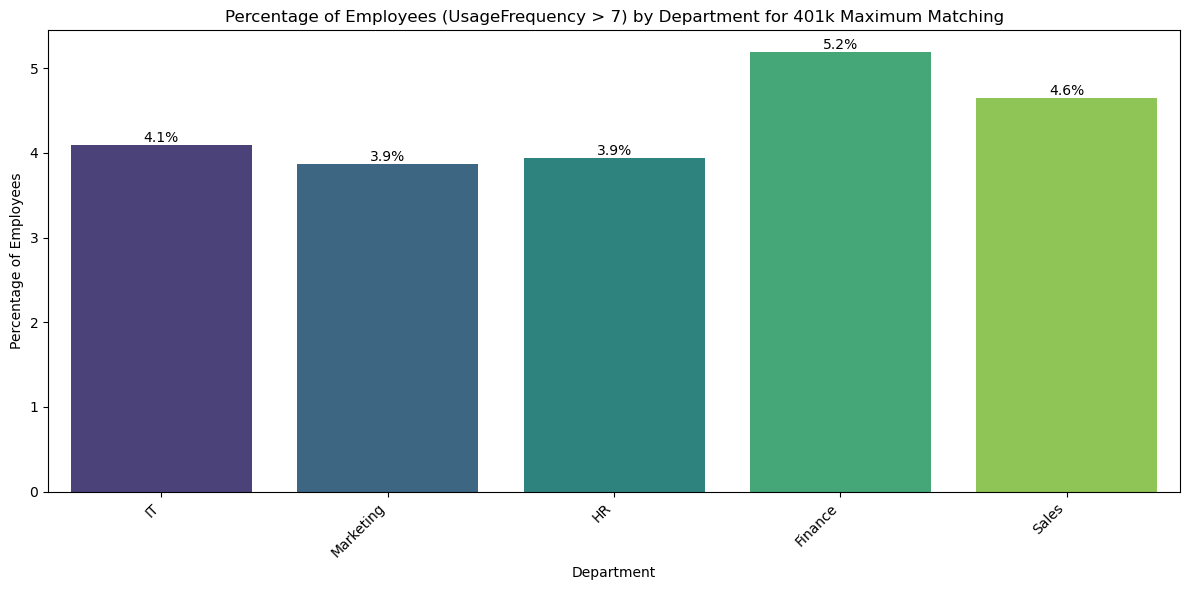

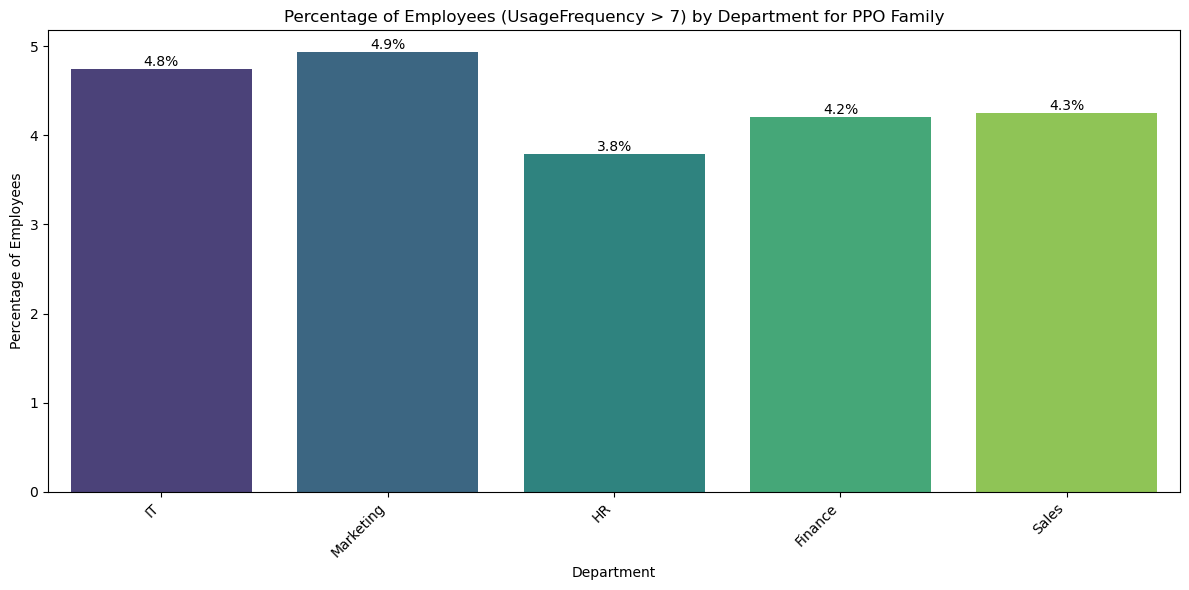

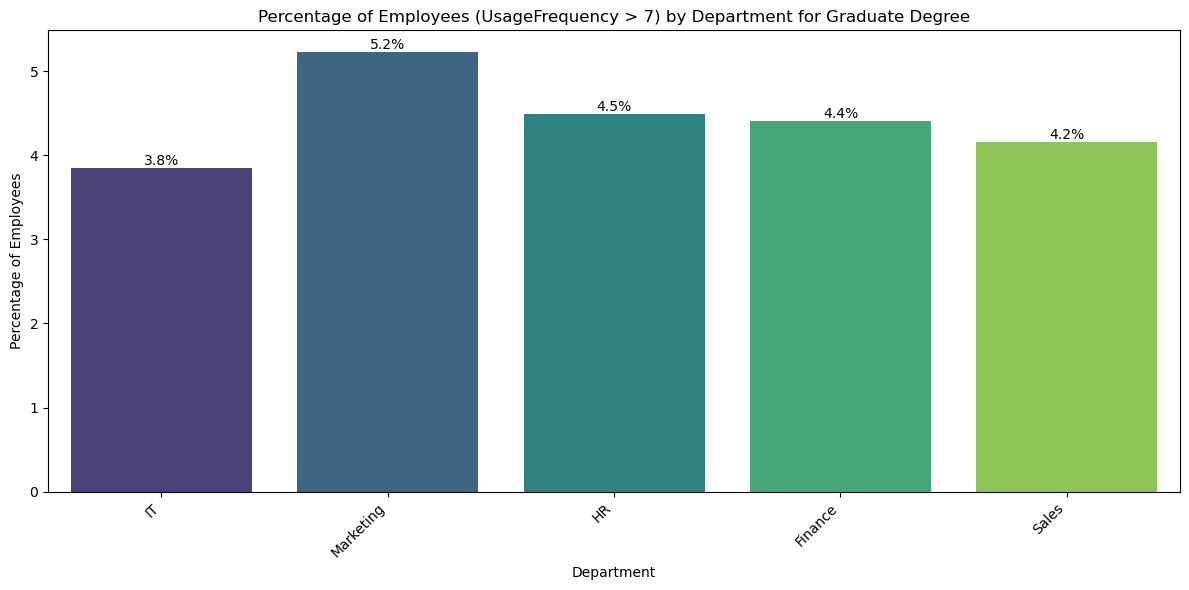

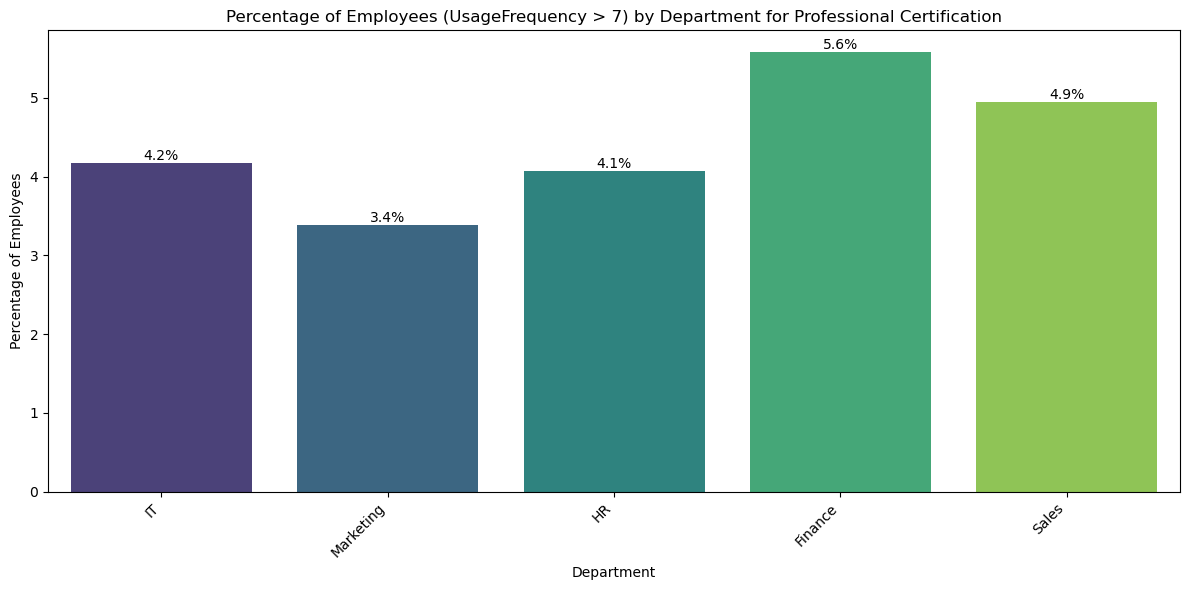

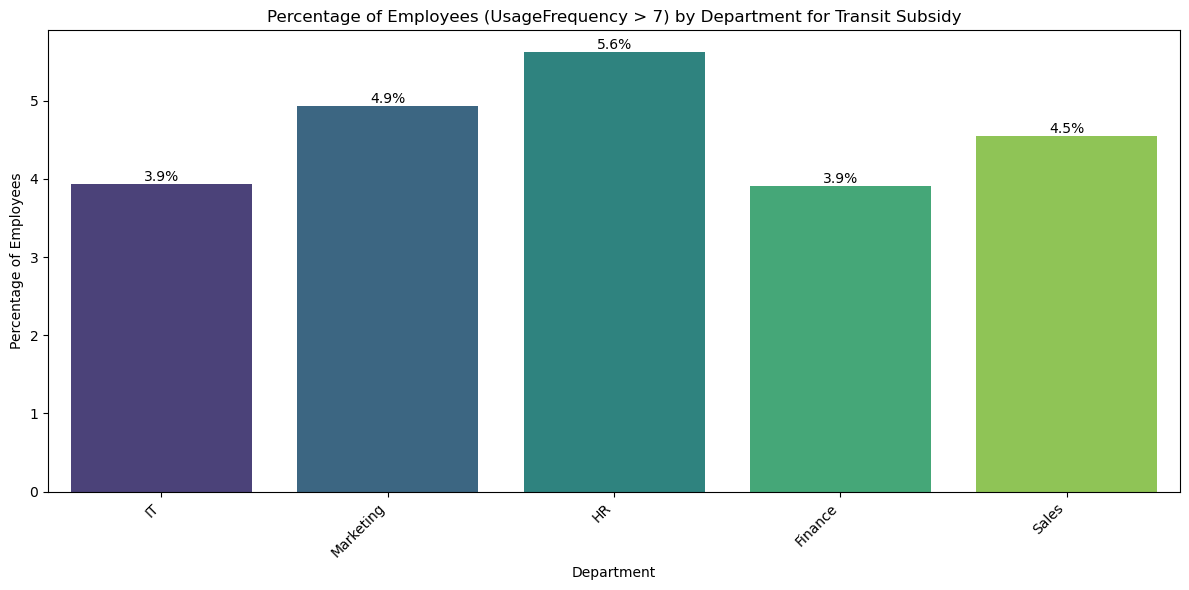

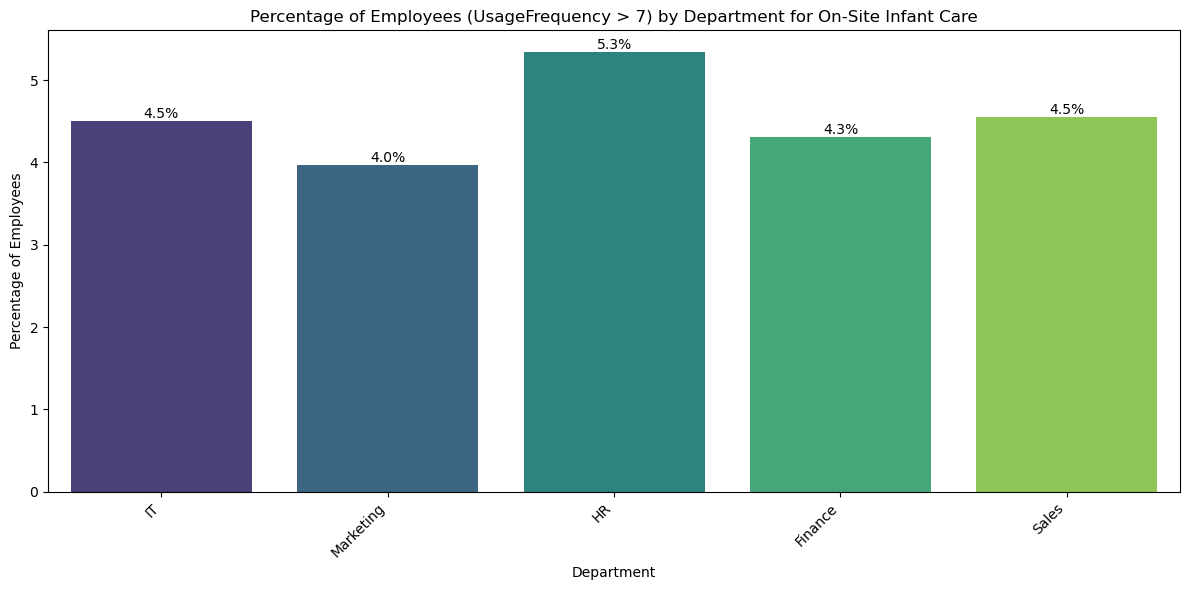

In [17]:
# Pick 5 useful BenefitSubTypes
selected_subtypes = [
    '401k Maximum Matching',
    'PPO Family',
    'Graduate Degree',
    'Professional Certification',
    'Transit Subsidy',
    'On-Site Infant Care'
]

# Filter employees with UsageFrequency > 7
filtered = df[df['UsageFrequency'] > 7]

# Count unique employees per BenefitSubType + Department
counts = (
    filtered
    .groupby(['BenefitSubType', 'Department'])['EmployeeID']
    .nunique()
    .reset_index(name='Count')
)

# Total employees per Department (denominator)
totals = (
    df.groupby('Department')['EmployeeID']
    .nunique()
    .reset_index(name='Total')
)

# Merge to compute percentages
counts = counts.merge(totals, on='Department', how='left')
counts['Percentage'] = (counts['Count'] / counts['Total']) * 100

dept_order = df['Department'].unique()

plt.rcParams['patch.edgecolor'] = 'none'
plt.rcParams['patch.linewidth'] = 0

for subtype in selected_subtypes:
    subset = counts[counts['BenefitSubType'] == subtype].set_index('Department')
    subset = subset.reindex(dept_order, fill_value=0).reset_index()
    
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(
        data=subset,
        x='Department',
        y='Percentage',
        palette='viridis',
        errorbar=None
    )
    
    # Annotate percentages
    for p in ax.patches:
        h = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2.,
            h,
            f"{h:.1f}%",
            ha='center',
            va='bottom'
        )
    
    plt.title(f'Percentage of Employees (UsageFrequency > 7) by Department for {subtype}')
    plt.xlabel('Department')
    plt.ylabel('Percentage of Employees')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


### By AgeGroups

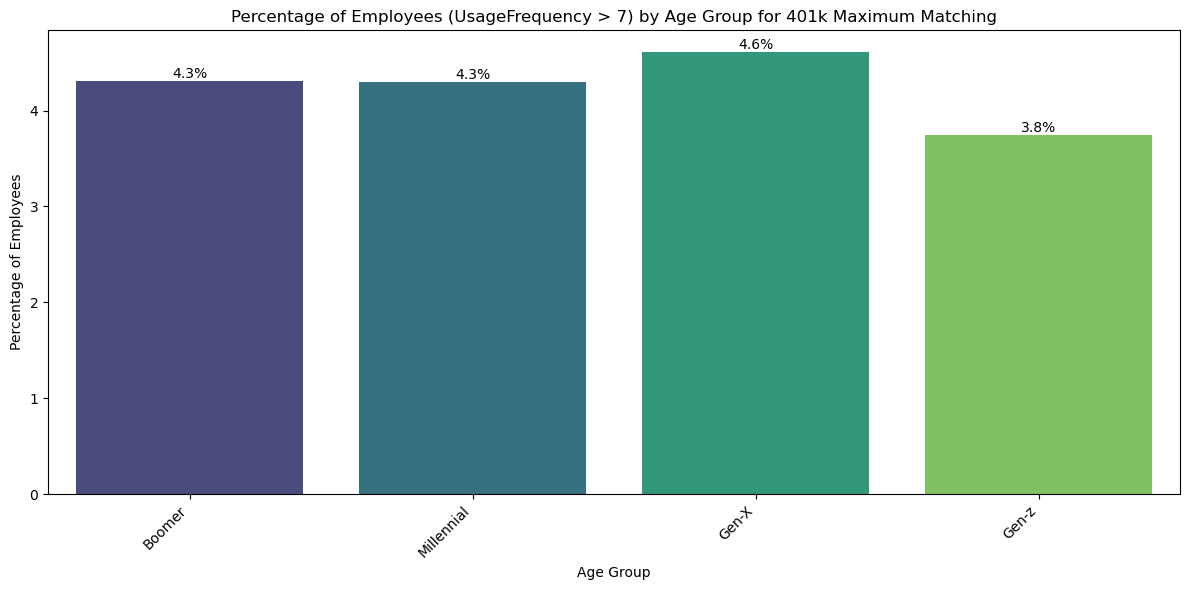

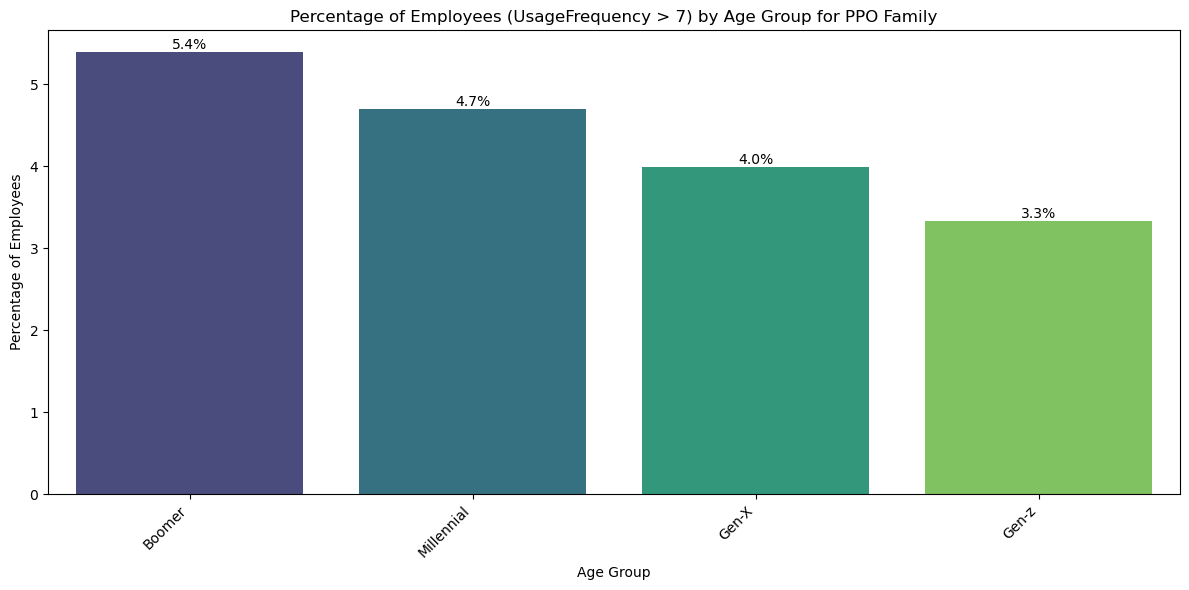

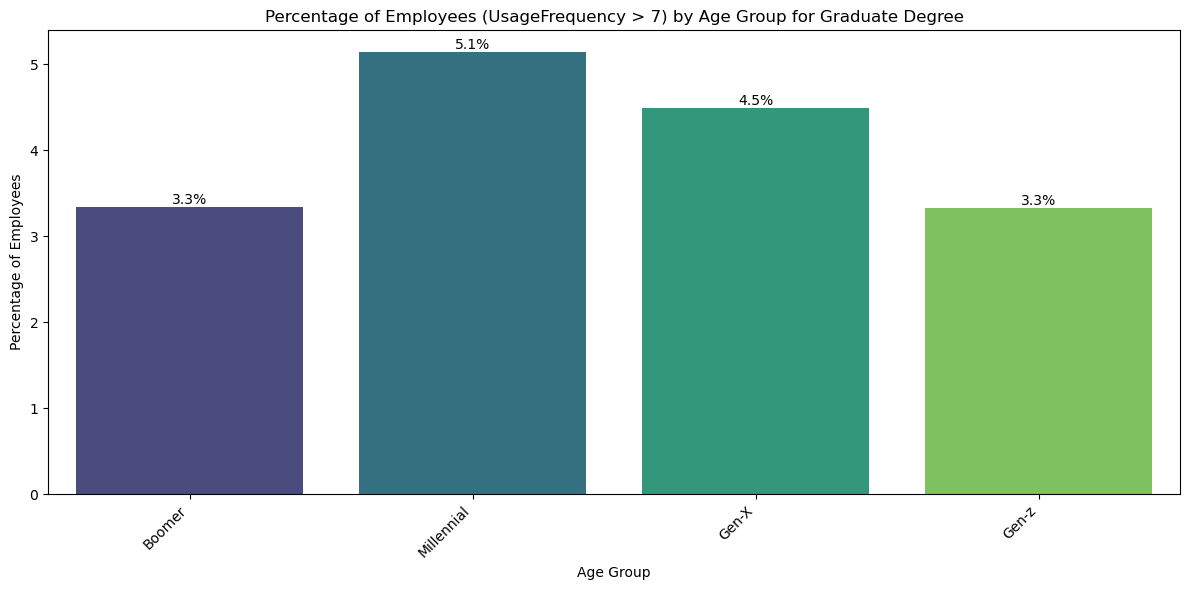

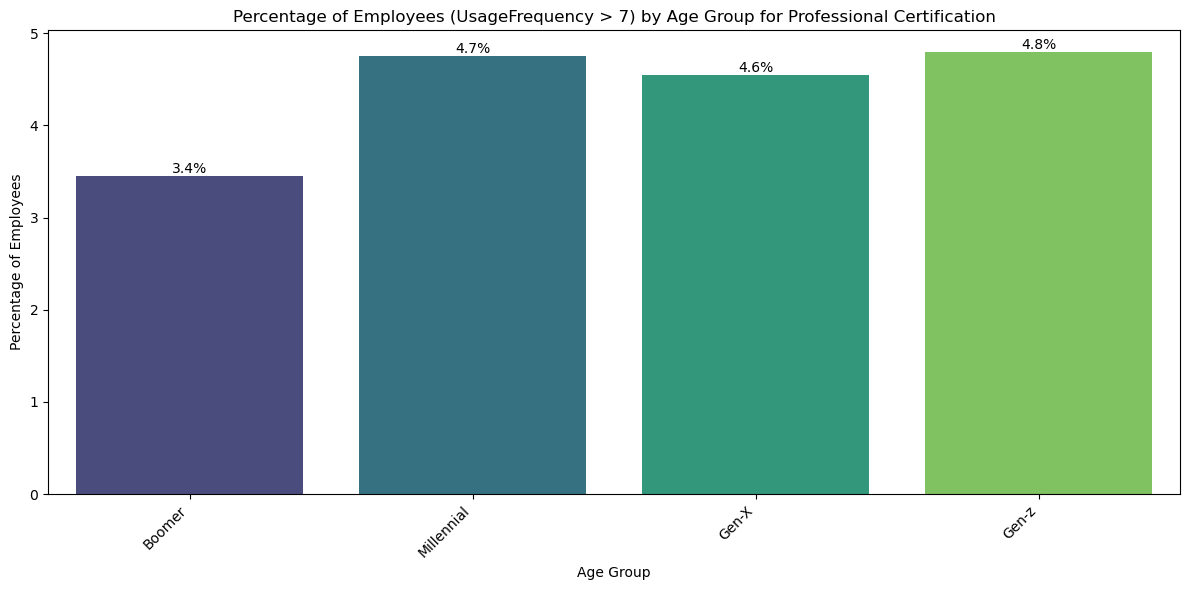

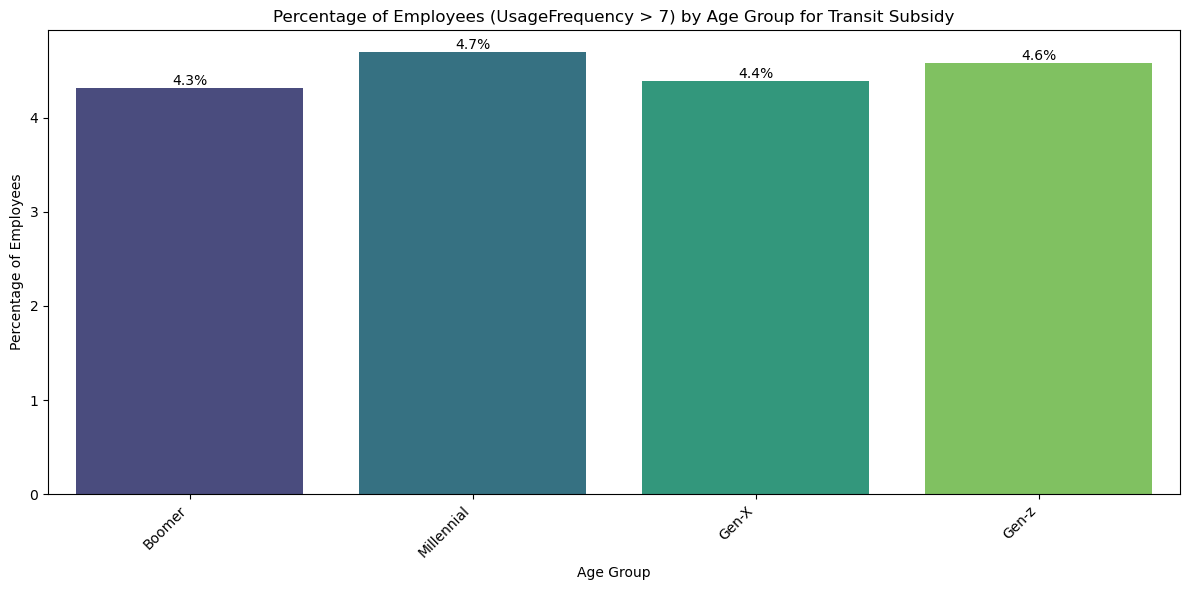

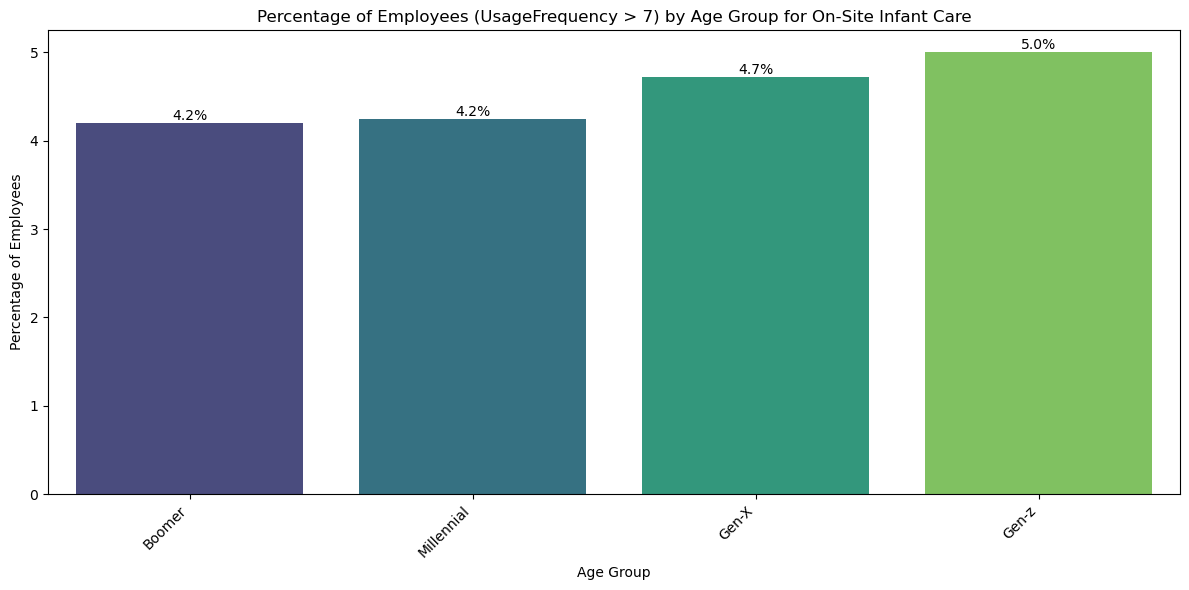

In [18]:
# Pick 6 useful BenefitSubTypes
selected_subtypes = [
    '401k Maximum Matching',
    'PPO Family',
    'Graduate Degree',
    'Professional Certification',
    'Transit Subsidy',
    'On-Site Infant Care'
]

# Filter employees with UsageFrequency > 7
filtered = df[df['UsageFrequency'] > 7]

# Count unique employees per BenefitSubType + AgeGroup
counts = (
    filtered
    .groupby(['BenefitSubType', 'AgeGroup'])['EmployeeID']
    .nunique()
    .reset_index(name='Count')
)

# Total employees per AgeGroup (denominator)
totals = (
    df.groupby('AgeGroup')['EmployeeID']
    .nunique()
    .reset_index(name='Total')
)

# Merge to compute percentages
counts = counts.merge(totals, on='AgeGroup', how='left')
counts['Percentage'] = (counts['Count'] / counts['Total']) * 100

age_order = df['AgeGroup'].unique()

plt.rcParams['patch.edgecolor'] = 'none'
plt.rcParams['patch.linewidth'] = 0

for subtype in selected_subtypes:
    subset = counts[counts['BenefitSubType'] == subtype].set_index('AgeGroup')
    subset = subset.reindex(age_order, fill_value=0).reset_index()
    
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(
        data=subset,
        x='AgeGroup',
        y='Percentage',
        palette='viridis',
        errorbar=None
    )
    
    # Annotate percentages
    for p in ax.patches:
        h = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2.,
            h,
            f"{h:.1f}%",
            ha='center',
            va='bottom'
        )
    
    plt.title(f'Percentage of Employees (UsageFrequency > 7) by Age Group for {subtype}')
    plt.xlabel('Age Group')
    plt.ylabel('Percentage of Employees')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


### By Gender

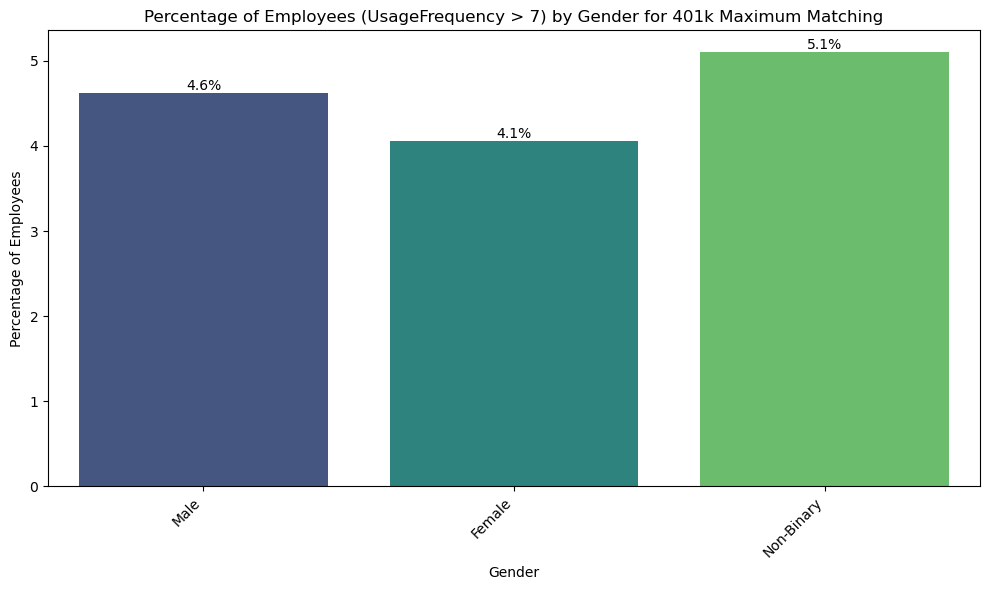

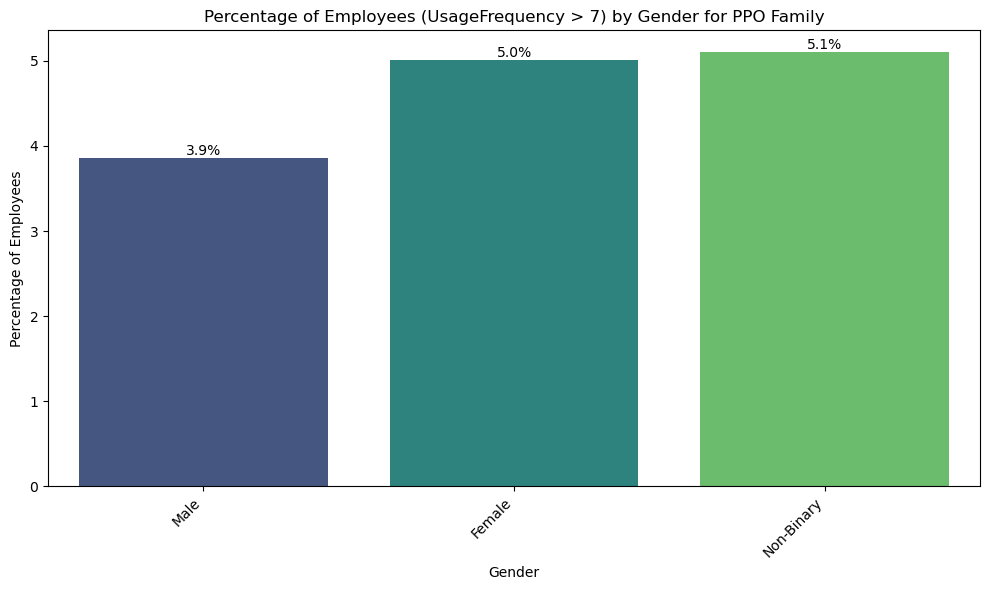

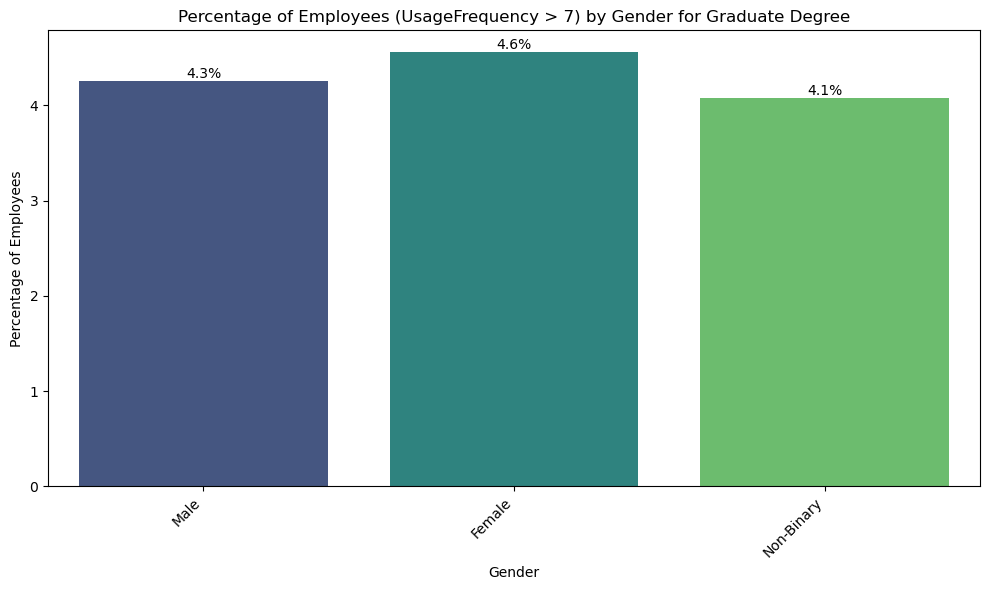

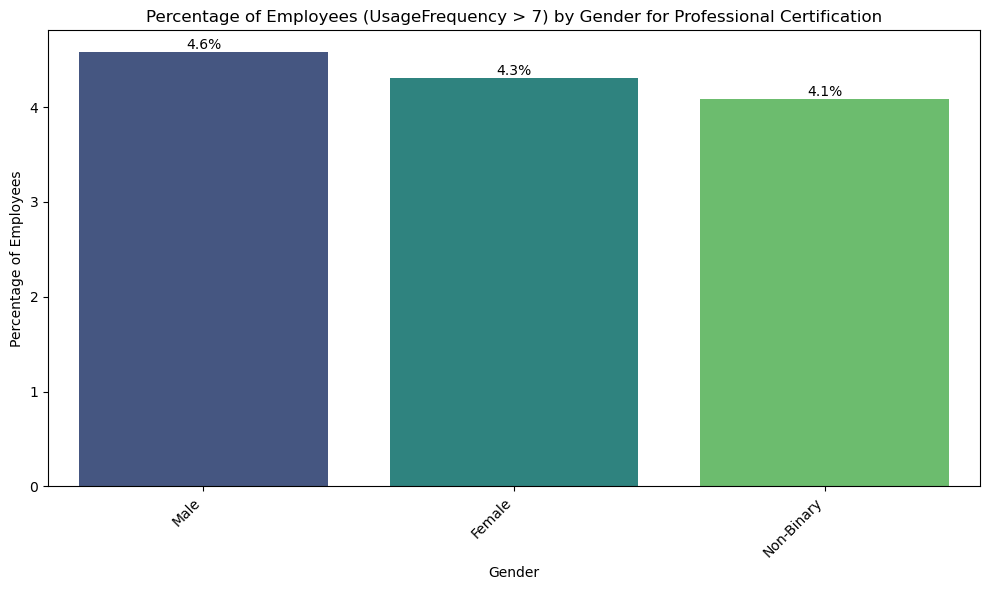

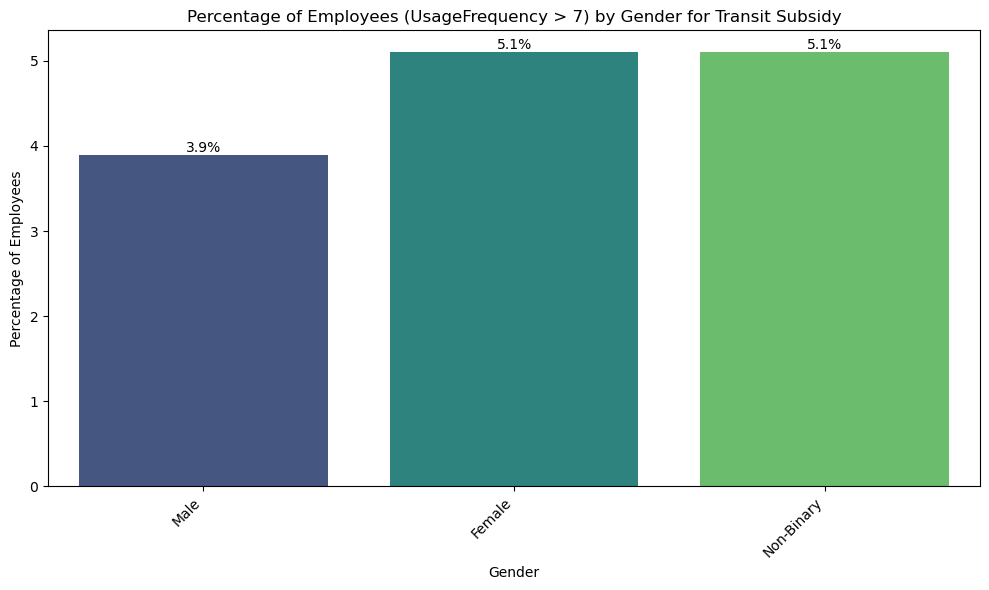

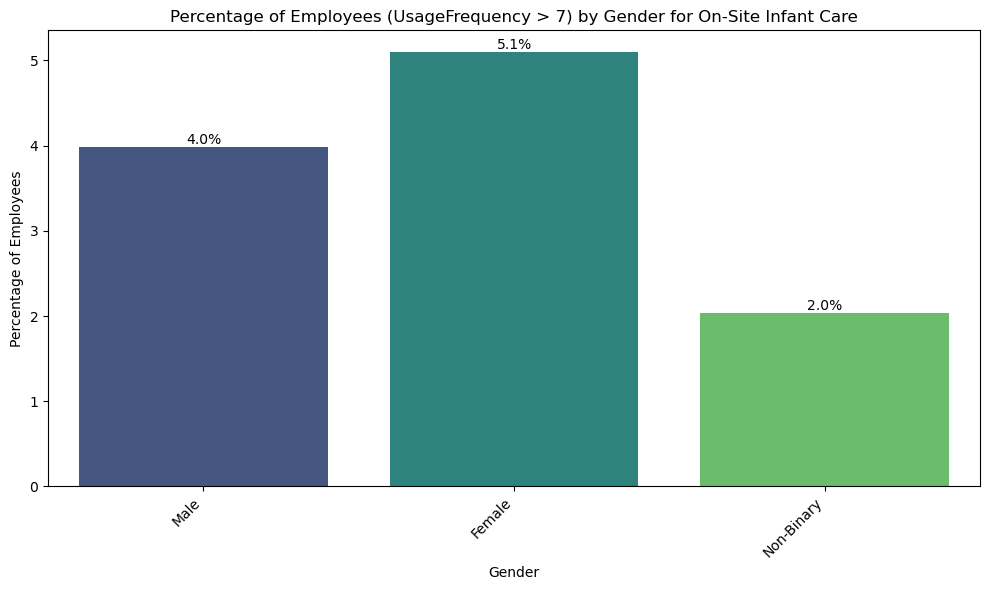

In [19]:
# Pick 6 useful BenefitSubTypes
selected_subtypes = [
    '401k Maximum Matching',
    'PPO Family',
    'Graduate Degree',
    'Professional Certification',
    'Transit Subsidy',
    'On-Site Infant Care'
]

# Filter employees with UsageFrequency > 7
filtered = df[df['UsageFrequency'] > 7]

# Count unique employees per BenefitSubType + Gender
counts = (
    filtered
    .groupby(['BenefitSubType', 'Gender'])['EmployeeID']
    .nunique()
    .reset_index(name='Count')
)

# Total employees per Gender (denominator)
totals = (
    df.groupby('Gender')['EmployeeID']
    .nunique()
    .reset_index(name='Total')
)

# Merge to compute percentages
counts = counts.merge(totals, on='Gender', how='left')
counts['Percentage'] = (counts['Count'] / counts['Total']) * 100

gender_order = df['Gender'].unique()

plt.rcParams['patch.edgecolor'] = 'none'
plt.rcParams['patch.linewidth'] = 0

for subtype in selected_subtypes:
    subset = counts[counts['BenefitSubType'] == subtype].set_index('Gender')
    subset = subset.reindex(gender_order, fill_value=0).reset_index()
    
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        data=subset,
        x='Gender',
        y='Percentage',
        palette='viridis',
        errorbar=None
    )
    
    # Annotate percentages
    for p in ax.patches:
        h = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2.,
            h,
            f"{h:.1f}%",
            ha='center',
            va='bottom'
        )
    
    plt.title(f'Percentage of Employees (UsageFrequency > 7) by Gender for {subtype}')
    plt.xlabel('Gender')
    plt.ylabel('Percentage of Employees')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
